### ANÁLISIS EXPLORATORIO DE DATOS (EDA)

En primer lugar se procede a importar las librerías necesarias:

In [28]:
import pandas as pd          # Manejo y análisis de datos en tablas (DataFrames)
import numpy as np           # Cálculos numéricos y manejo de arreglos
from IPython.display import display  # Muestra objetos de forma clara en notebooks
import matplotlib.pyplot as plt      # Crear gráficos y visualizaciones
import seaborn as sns        # Gráficos estadísticos atractivos (basado en matplotlib)
from scipy import stats      # Funciones y pruebas estadísticas
from matplotlib.lines import Line2D  # Crear o personalizar líneas en gráficos
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)   #ignorar advertencias

Cargamos los archivos csv:

In [ ]:
# ver todas las columnas
pd.set_option('display.max_columns', None)

In [3]:
# ver todas las filas
pd.set_option('display.max_rows', None)

#### **ai_adoption_dataset.csv**:

Este conjunto de datos ofrece una visión panorámica de cómo las tecnologías de IA están transformando los negocios, la industria y la sociedad a nivel mundial. Permite analizar las tasas de adopción de herramientas de IA populares en diferentes regiones y sectores. Estudiar la demografía de los usuarios y los perfiles de las empresas que influyen en la integración de la IA. 
Evaluar la preparación para la IA por industrias, países y tamaños de empresas.

In [4]:
df_ai_adoption = pd.read_csv("ai_adoption_dataset.csv")

#### **AI_index_db.csv**:

El conjunto de datos "Índice Global de IA" incluye el propio Índice Global de IA y siete indicadores que lo afectan en 62 países, así como información general sobre cada país (región, grupo, grupo de ingresos y régimen político).

El Índice Global de IA es el primer índice que evalúa a las naciones en función de su nivel de inversión, innovación e implementación de inteligencia artificial.

Talento, Infraestructura y Entorno Operativo son los factores del grupo de indicadores de Implementación de IA, que representa la aplicación de la inteligencia artificial por parte de profesionales en diversos sectores, como empresas, gobiernos y comunidades.

El indicador de talento se centra en la disponibilidad de profesionales cualificados para la provisión de soluciones de inteligencia artificial.

El indicador de infraestructura se centra en la fiabilidad y la escala de la infraestructura de acceso, desde la electricidad e internet hasta las capacidades de supercomputación.

El indicador de Entorno Operativo se centra en el contexto regulatorio y la opinión pública en torno a la inteligencia artificial.

La Investigación y el Desarrollo son los factores del grupo de indicadores de Innovación, que reflejan el progreso tecnológico y metodológico, lo que indica el potencial de la inteligencia artificial para evolucionar y mejorar.

La Estrategia Gubernamental y Comercial son los factores del grupo de indicadores de Inversión, que reflejan los compromisos financieros y procesales con la inteligencia artificial.

In [5]:
df_index = pd.read_csv("AI_index_db.csv")

#### **Preparedness_ai.csv**:

Hoy en día, la IA ha adquirido gran importancia en diversos aspectos de la vida. Cada país o región del mundo presenta una adopción e integración de la inteligencia artificial (IA) diferente en su economía, sociedad y gobernanza. Diversos factores contribuyen a la capacidad de un país para aprovechar eficazmente el potencial de las tecnologías de IA, como la infraestructura, el capital humano, la capacidad de innovación, los marcos regulatorios y los factores sociales.

El Índice de Preparación para la IA mide la preparación de un país para adoptar e integrar la inteligencia artificial (IA) en su economía, sociedad y gobernanza. Cuanto mayor sea el Índice de Preparación para la IA, mayor será la capacidad de un país para adoptar e integrar tecnologías de IA. Los componentes clave del Índice de Preparación para la IA incluyen la infraestructura digital (disponibilidad de internet de alta velocidad, servidores seguros y otra infraestructura tecnológica), la alfabetización digital (nivel de educación, formación y experiencia en tecnologías de IA y campos relacionados), el entorno regulatorio de un país para la IA (ética de la IA, protección de la privacidad y gobernanza de datos) y la capacidad del país para fomentar la innovación e incorporar la IA en su marco económico.

In [6]:
df_ai_preparedness = pd.read_csv("Preparedness_ai.csv", encoding="ISO-8859-1")

Función EDA inicial para una primera aproximación a los datasets:

In [7]:
def eda_inicial(df):
    """
    Exploratory Data Analysis (EDA) profesional de un DataFrame.

    Incluye:
    - Vista general (dimensiones, tipos, primeras/últimas filas)
    - Estadísticas descriptivas (numéricas y categóricas)
    - Valores nulos, duplicados y únicos
    - Detección de outliers (numéricos)
    """


    # COMPROBACIONES INICIALES DEL DATASET
    print(f"Dimensiones del dataset: {df.shape[0]:,} filas × {df.shape[1]:,} columnas\n")
    print(" Primeras 5 filas del dataset:")
    display(df.head())

    print("\n Últimas 5 filas del dataset:")
    display(df.tail())

    print("\nInformación general:")
    df.info()

    print("\nTipos de datos por columna:")
    display(df.dtypes.to_frame("Tipo de dato"))

    # SEPARACIÓN DE VARIABLES SEGÚN SU TIPO
    num_cols = df.select_dtypes(include="number").columns.tolist()
    cat_cols = df.select_dtypes(include=["object", "category"]).columns.tolist()

    print(f"\nColumnas numéricas: {len(num_cols)}")
    print(f"Columnas categóricas: {len(cat_cols)}")

    # ESTADÍSTICAS DESCRIPTIVAS Y DETECCIÓN DE OUTLIERS
    if num_cols:
        print("\nEstadísticas descriptivas (numéricas):")
        display(df[num_cols].describe(percentiles=[.01, .05, .25, .5, .75, .95, .99]).T)

        Q1 = df[num_cols].quantile(0.25)
        Q3 = df[num_cols].quantile(0.75)
        IQR = Q3 - Q1
        outliers = ((df[num_cols] < (Q1 - 1.5 * IQR)) | (df[num_cols] > (Q3 + 1.5 * IQR))).sum()

        outliers = outliers[outliers > 0]
        if not outliers.empty:
            print("\nPosibles outliers detectados:")
            display(outliers.to_frame("Filas con outliers"))
        else:
            print("\nNo se detectaron outliers significativos.")

    # ESTADÍSTICAS DESCRIPTIVAS PARA VARIABLES CATEGÓRICAS
    if cat_cols:
        print("\nEstadísticas descriptivas (categóricas):")
        display(df[cat_cols].describe().T)
    else:
        print("\nNo hay columnas categóricas.")

    # COMPROBACIÓN DE VALORES NULOS Y DUPLICADOS
    print("\nValores nulos por columna:")
    nulos_df = pd.DataFrame({
        "Nulos": df.isnull().sum(),
        "% Nulos": (df.isnull().mean() * 100).round(2)
    }).sort_values("% Nulos", ascending=False)

    if nulos_df["Nulos"].sum() == 0:
        print("No se encontraron valores nulos en el dataset.")
    else:
        display(nulos_df[nulos_df["Nulos"] > 0])

    dup_count = df.duplicated().sum()
    if dup_count == 0:
        print("\nNo se encontraron filas duplicadas en el dataset.")
    else:
        print(f"\nFilas duplicadas: {dup_count:,}")

    # RESUMEN GENERAL DEL DATASET
    resumen = pd.DataFrame({
        "Columna": df.columns,
        "Tipo": df.dtypes.astype(str),
        "Valores únicos": df.nunique().values,
        "% Nulos": (df.isnull().mean() * 100).round(2).values
    })
    print("\nResumen general de columnas:")
    display(resumen)


In [8]:
resumen_1 = eda_inicial(df_ai_adoption)

Dimensiones del dataset: 145,000 filas × 9 columnas

 Primeras 5 filas del dataset:


,country,industry,ai_tool,adoption_rate,daily_active_users,year,user_feedback,age_group,company_size
0,USA,Technology,ChatGPT,40.45,2461,2023,YyvLXOFyevRMSvJtkXodLvgejiqQNvSOZfeeJASDOVTxwm...,35-44,Startup
1,France,Manufacturing,Midjourney,35.72,8496,2024,AdFVhenjthYSKJNzxzfaGQk wLnjRCgrHTyfXQEFjFJCMO...,18-24,Enterprise
2,Australia,Transportation,ChatGPT,13.47,8641,2024,zgNPmXBICRNbpjpTqIUWmMTeTYsInDNtAmzuxpDvcUZEAi...,45-54,Startup
3,UK,Manufacturing,ChatGPT,48.46,3488,2023,LxeKzQFbPvhxXUSgPVlLLJ pUFaicjCgiMtAmsTjovkrdE...,45-54,Enterprise
4,UK,Agriculture,Stable Diffusion,34.06,1124,2024,IOQtQoSKdSmiXRsUKpjXjXZgQohymFkVUvOASXlEnVsIOS...,45-54,SME



 Últimas 5 filas del dataset:


,country,industry,ai_tool,adoption_rate,daily_active_users,year,user_feedback,age_group,company_size
144995,Australia,Agriculture,Midjourney,86.93,7921,2023,PxWkyTVwSNPoTXjsKzjbAFEfyJ MdgY CXjvSrkkHOTGcb...,18-24,SME
144996,Germany,Education,Midjourney,51.99,6301,2024,PtOmfGyWyZueDERRioCvbNgXomcpNNLFUjRuMEqeMrqR L...,45-54,SME
144997,USA,Finance,Stable Diffusion,47.35,4726,2023,VQuOdOKjRhchmEFrzvGlqsGOc fbTXzuzQzswt pZTCmhx...,45-54,Startup
144998,USA,Retail,ChatGPT,31.87,2481,2024,IRFOudTsoPrlrKypvToOx llYkLoLqrw EMHOtyAKmqXq...,25-34,Enterprise
144999,Canada,Technology,Claude,96.84,6479,2024,pwVBio hjlquPxOkabYZsvNwXFWresQdMGmeqmBicAbHzo...,35-44,Enterprise



Información general:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145000 entries, 0 to 144999
Data columns (total 9 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   country             145000 non-null  object 
 1   industry            145000 non-null  object 
 2   ai_tool             145000 non-null  object 
 3   adoption_rate       145000 non-null  float64
 4   daily_active_users  145000 non-null  int64  
 5   year                145000 non-null  int64  
 6   user_feedback       145000 non-null  object 
 7   age_group           145000 non-null  object 
 8   company_size        145000 non-null  object 
dtypes: float64(1), int64(2), object(6)
memory usage: 10.0+ MB

Tipos de datos por columna:


,Tipo de dato
country,object
industry,object
ai_tool,object
adoption_rate,float64
daily_active_users,int64
year,int64
user_feedback,object
age_group,object
company_size,object



Columnas numéricas: 3
Columnas categóricas: 6

Estadísticas descriptivas (numéricas):


,count,mean,std,min,1%,5%,25%,50%,75%,95%,99%,max
adoption_rate,145000.0,49.873025,28.842523,0.0,1.02,4.96,24.93,49.76,74.84,94.95,98.98,100.0
daily_active_users,145000.0,5039.302683,2858.124918,100.0,199.00,596.00,2566.00,5036.00,7515.00,9506.00,9901.00,9999.0
year,145000.0,2023.703117,0.456886,2023.0,2023.00,2023.00,2023.00,2024.00,2024.00,2024.00,2024.00,2024.0



No se detectaron outliers significativos.

Estadísticas descriptivas (categóricas):


,count,unique,top,freq
country,145000,10,Australia,14723
industry,145000,8,Manufacturing,18267
ai_tool,145000,5,ChatGPT,58045
user_feedback,145000,145000,pwVBio hjlquPxOkabYZsvNwXFWresQdMGmeqmBicAbHzo...,1
age_group,145000,5,55+,29424
company_size,145000,3,Startup,48601



Valores nulos por columna:
No se encontraron valores nulos en el dataset.

No se encontraron filas duplicadas en el dataset.

Resumen general de columnas:


,Columna,Tipo,Valores únicos,% Nulos
country,country,object,10,0.0
industry,industry,object,8,0.0
ai_tool,ai_tool,object,5,0.0
adoption_rate,adoption_rate,float64,10001,0.0
daily_active_users,daily_active_users,int64,9900,0.0
year,year,int64,2,0.0
user_feedback,user_feedback,object,145000,0.0
age_group,age_group,object,5,0.0
company_size,company_size,object,3,0.0


In [9]:
resumen_2 = eda_inicial(df_index)

Dimensiones del dataset: 62 filas × 13 columnas

 Primeras 5 filas del dataset:


,Country,Talent,Infrastructure,Operating Environment,Research,Development,Government Strategy,Commercial,Total score,Region,Cluster,Income group,Political regime
0,United States of America,100.00,94.02,64.56,100.00,100.00,77.39,100.00,100.00,Americas,Power players,High,Liberal democracy
1,China,16.51,100.00,91.57,71.42,79.97,94.87,44.02,62.92,Asia-Pacific,Power players,Upper middle,Closed autocracy
2,United Kingdom,39.65,71.43,74.65,36.50,25.03,82.82,18.91,40.93,Europe,Traditional champions,High,Liberal democracy
3,Canada,31.28,77.05,93.94,30.67,25.78,100.00,14.88,40.19,Americas,Traditional champions,High,Liberal democracy
4,Israel,35.76,67.58,82.44,32.63,27.96,43.91,27.33,39.89,Middle East,Rising stars,High,Liberal democracy



 Últimas 5 filas del dataset:


,Country,Talent,Infrastructure,Operating Environment,Research,Development,Government Strategy,Commercial,Total score,Region,Cluster,Income group,Political regime
57,Sri Lanka,6.27,34.64,35.79,0.12,0.95,35.57,0.09,6.62,Asia-Pacific,Nascent,Lower middle,Electoral democracy
58,Egypt,1.11,38.84,0.00,2.08,1.54,68.72,0.31,4.83,Middle East,Nascent,Lower middle,Electoral autocracy
59,Kenya,0.75,14.11,29.84,0.07,12.15,7.75,0.31,2.30,Africa,Nascent,Lower middle,Electoral autocracy
60,Nigeria,2.74,0.00,50.10,0.45,2.06,7.75,0.33,1.38,Africa,Nascent,Lower middle,Electoral autocracy
61,Pakistan,8.00,2.43,12.48,2.17,1.09,13.92,0.27,0.00,Asia-Pacific,Nascent,Lower middle,Electoral autocracy



Información general:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Country                62 non-null     object 
 1   Talent                 62 non-null     float64
 2   Infrastructure         62 non-null     float64
 3   Operating Environment  62 non-null     float64
 4   Research               62 non-null     float64
 5   Development            62 non-null     float64
 6   Government Strategy    62 non-null     float64
 7   Commercial             62 non-null     float64
 8   Total score            62 non-null     float64
 9   Region                 62 non-null     object 
 10  Cluster                62 non-null     object 
 11  Income group           62 non-null     object 
 12  Political regime       62 non-null     object 
dtypes: float64(8), object(5)
memory usage: 6.4+ KB

Tipos de datos por columna:


,Tipo de dato
Country,object
Talent,float64
Infrastructure,float64
Operating Environment,float64
Research,float64
Development,float64
Government Strategy,float64
Commercial,float64
Total score,float64
Region,object



Columnas numéricas: 8
Columnas categóricas: 5

Estadísticas descriptivas (numéricas):


,count,mean,std,min,1%,5%,25%,50%,75%,95%,99%,max
Talent,62.0,16.803065,15.214963,0.0,0.4575,1.7665,7.3650,13.445,24.5675,39.1990,66.6147,100.0
Infrastructure,62.0,63.503710,20.217525,0.0,1.4823,33.9465,55.8575,65.230,75.9475,93.7940,97.6271,100.0
Operating Environment,62.0,66.925484,20.000424,0.0,7.6128,35.8330,58.1075,69.505,80.5000,94.5195,99.7316,100.0
Research,62.0,16.610000,17.413996,0.0,0.0427,0.2885,3.0325,12.930,25.4125,37.6115,82.5662,100.0
Development,62.0,14.824677,19.419279,0.0,0.0000,0.0570,1.2025,9.005,19.9800,40.8160,87.7817,100.0
Government Strategy,62.0,57.865645,26.252448,0.0,4.7275,12.1800,41.0300,63.930,77.9525,91.2760,96.8707,100.0
Commercial,62.0,6.171935,14.029632,0.0,0.0549,0.1545,0.6975,2.585,5.3075,18.7180,65.8522,100.0
Total score,62.0,23.914677,15.123586,0.0,0.8418,4.9195,14.8050,23.220,30.4875,40.1750,77.3812,100.0



Posibles outliers detectados:


,Filas con outliers
Talent,1
Infrastructure,3
Operating Environment,2
Research,2
Development,3
Commercial,7
Total score,2



Estadísticas descriptivas (categóricas):


,count,unique,top,freq
Country,62,62,United States of America,1
Region,62,5,Europe,29
Cluster,62,5,Waking up,40
Income group,62,3,High,43
Political regime,62,4,Liberal democracy,27



Valores nulos por columna:
No se encontraron valores nulos en el dataset.

No se encontraron filas duplicadas en el dataset.

Resumen general de columnas:


,Columna,Tipo,Valores únicos,% Nulos
Country,Country,object,62,0.0
Talent,Talent,float64,62,0.0
Infrastructure,Infrastructure,float64,62,0.0
Operating Environment,Operating Environment,float64,62,0.0
Research,Research,float64,61,0.0
Development,Development,float64,59,0.0
Government Strategy,Government Strategy,float64,59,0.0
Commercial,Commercial,float64,59,0.0
Total score,Total score,float64,62,0.0
Region,Region,object,5,0.0


In [10]:
resumen_3 = eda_inicial(df_ai_preparedness)

Dimensiones del dataset: 174 filas × 12 columnas

 Primeras 5 filas del dataset:


,ISO,Country,AI preparedness Index,GDP per capita (current US$),GDP per capita growth (annual %),Real GDP growth (Annual change in %),Innovation and Economic Integration,Digitial Infrastructure,Individuals using the Internet (% of population),Secure Internet servers (per 1 million people),Regulation and Ethics,Human Capital and Labor Market Policies
0,AUS,Australia,0.73,64821.0,0.94,2.0,0.16,0.18,97.1,47568.0,0.21,0.17
1,AUT,Austria,0.72,56034.0,-1.93,-0.8,0.17,0.19,95.3,42281.0,0.20,0.16
2,BEL,Belgium,0.67,54701.0,0.33,1.4,0.17,0.17,94.6,33643.0,0.16,0.16
3,CAN,Canada,0.71,53431.0,-1.68,1.2,0.16,0.17,94.0,42550.0,0.21,0.17
4,HRV,Croatia,0.58,21865.0,3.19,3.1,0.14,0.17,83.2,29422.0,0.14,0.13



 Últimas 5 filas del dataset:


,ISO,Country,AI preparedness Index,GDP per capita (current US$),GDP per capita growth (annual %),Real GDP growth (Annual change in %),Innovation and Economic Integration,Digitial Infrastructure,Individuals using the Internet (% of population),Secure Internet servers (per 1 million people),Regulation and Ethics,Human Capital and Labor Market Policies
169,UZB,Uzbekistan,NaN,2850.0,4.16,6.3,NaN,0.11,89.0,824.0,0.10,0.13
170,VNM,Viet Nam,0.48,4282.0,4.34,5.0,0.11,0.14,78.1,5256.0,0.11,0.12
171,YEM,Yemen,0.25,477.0,NaN,-2.0,0.12,0.04,NaN,7.0,0.02,0.07
172,ZMB,Zambia,0.37,1331.0,2.46,5.4,0.10,0.07,33.0,55.0,0.09,0.11
173,ZWE,Zimbabwe,0.30,2156.0,3.58,5.3,0.09,0.06,38.4,89.0,0.06,0.09



Información general:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 174 entries, 0 to 173
Data columns (total 12 columns):
 #   Column                                            Non-Null Count  Dtype  
---  ------                                            --------------  -----  
 0   ISO                                               174 non-null    object 
 1   Country                                           174 non-null    object 
 2   AI preparedness Index                             165 non-null    float64
 3   GDP per capita (current US$)                      168 non-null    float64
 4   GDP per capita growth (annual %)                  167 non-null    float64
 5   Real GDP growth (Annual change in %)              170 non-null    float64
 6   Innovation and Economic Integration               167 non-null    float64
 7   Digitial Infrastructure                           173 non-null    float64
 8   Individuals using the Internet (% of population)  162 non-null    float64
 9  

,Tipo de dato
ISO,object
Country,object
AI preparedness Index,float64
GDP per capita (current US$),float64
GDP per capita growth (annual %),float64
Real GDP growth (Annual change in %),float64
Innovation and Economic Integration,float64
Digitial Infrastructure,float64
Individuals using the Internet (% of population),float64
Secure Internet servers (per 1 million people),float64



Columnas numéricas: 10
Columnas categóricas: 2

Estadísticas descriptivas (numéricas):


,count,mean,std,min,1%,5%,25%,50%,75%,95%,99%,max
AI preparedness Index,165.0,0.476303,0.152052,0.18,0.2300,0.252,0.360,0.47,0.58,0.750,0.7736,0.80
GDP per capita (current US$),168.0,18210.619048,24031.990438,193.00,456.8700,633.250,2240.750,7154.00,23975.75,68112.050,100991.5900,128678.00
GDP per capita growth (annual %),167.0,2.135569,7.236847,-21.16,-12.3208,-3.525,0.080,1.81,3.60,6.910,21.2788,74.67
Real GDP growth (Annual change in %),170.0,2.996471,3.881482,-18.30,-4.1890,-1.420,1.100,2.90,5.00,7.500,9.0960,33.00
Innovation and Economic Integration,167.0,0.117305,0.032216,0.03,0.0466,0.070,0.090,0.11,0.14,0.177,0.1800,0.19
Digitial Infrastructure,173.0,0.109538,0.048174,0.02,0.0272,0.040,0.070,0.11,0.15,0.190,0.2000,0.21
Individuals using the Internet (% of population),162.0,72.293210,24.827124,11.10,14.4810,20.730,58.225,81.80,90.85,98.990,100.0000,100.00
Secure Internet servers (per 1 million people),173.0,24081.046243,66398.986815,1.00,2.7200,9.000,89.000,703.00,12300.00,144009.000,301702.6800,557174.00
Regulation and Ethics,174.0,0.121379,0.050401,0.01,0.0200,0.040,0.090,0.12,0.15,0.210,0.2200,0.23
Human Capital and Labor Market Policies,173.0,0.123468,0.034178,0.03,0.0400,0.066,0.100,0.12,0.15,0.174,0.1928,0.20



Posibles outliers detectados:


,Filas con outliers
GDP per capita (current US$),12
GDP per capita growth (annual %),8
Real GDP growth (Annual change in %),3
Secure Internet servers (per 1 million people),31



Estadísticas descriptivas (categóricas):


,count,unique,top,freq
ISO,174,174,AUS,1
Country,174,173,Congo,2



Valores nulos por columna:


,Nulos,% Nulos
Individuals using the Internet (% of population),12,6.90
AI preparedness Index,9,5.17
GDP per capita growth (annual %),7,4.02
Innovation and Economic Integration,7,4.02
GDP per capita (current US$),6,3.45
Real GDP growth (Annual change in %),4,2.30
Digitial Infrastructure,1,0.57
Secure Internet servers (per 1 million people),1,0.57
Human Capital and Labor Market Policies,1,0.57



No se encontraron filas duplicadas en el dataset.

Resumen general de columnas:


,Columna,Tipo,Valores únicos,% Nulos
ISO,ISO,object,174,0.00
Country,Country,object,173,0.00
AI preparedness Index,AI preparedness Index,float64,55,5.17
GDP per capita (current US$),GDP per capita (current US$),float64,167,3.45
GDP per capita growth (annual %),GDP per capita growth (annual %),float64,152,4.02
Real GDP growth (Annual change in %),Real GDP growth (Annual change in %),float64,86,2.30
Innovation and Economic Integration,Innovation and Economic Integration,float64,16,4.02
Digitial Infrastructure,Digitial Infrastructure,float64,20,0.57
Individuals using the Internet (% of population),Individuals using the Internet (% of population),float64,135,6.90
Secure Internet servers (per 1 million people),Secure Internet servers (per 1 million people),float64,158,0.57


#### IMPUTACIÓN DE VALORES NULOS

Únicamente presenta valores nulos df_preparedness, por tanto, procedemos a la imputación de los mismos.

In [11]:
# IMPUTACIÓN DE NULOS EN df_ai_preparedness

# 1. Índices generales — Imputamos con media global
cols_mean_global = [
    'AI preparedness Index',
    'Innovation and Economic Integration',
    'Regulation and Ethics',
    'Human Capital and Labor Market Policies'
]

for col in cols_mean_global:
    df_ai_preparedness[col].fillna(df_ai_preparedness[col].mean(), inplace=True)

# 2. Indicadores económicos — Imputamos con media por grupo , o media global
try:
    df_ai_preparedness['GDP per capita (current US$)'] = (
        df_ai_preparedness.groupby('income_group')['GDP per capita (current US$)']
        .transform(lambda x: x.fillna(x.mean()))
    )
except KeyError:
    df_ai_preparedness['GDP per capita (current US$)'].fillna(
        df_ai_preparedness['GDP per capita (current US$)'].mean(), inplace=True
    )

try:
    df_ai_preparedness['GDP per capita growth (annual %)'] = (
        df_ai_preparedness.groupby('income_group')['GDP per capita growth (annual %)']
        .transform(lambda x: x.fillna(x.mean()))
    )
except KeyError:
    df_ai_preparedness['GDP per capita growth (annual %)'].fillna(
        df_ai_preparedness['GDP per capita growth (annual %)'].mean(), inplace=True
    )

try:
    df_ai_preparedness['Real GDP growth (Annual change in %)'] = (
        df_ai_preparedness.groupby('income_group')['Real GDP growth (Annual change in %)']
        .transform(lambda x: x.fillna(x.mean()))
    )
except KeyError:
    df_ai_preparedness['Real GDP growth (Annual change in %)'].fillna(
        df_ai_preparedness['Real GDP growth (Annual change in %)'].mean(), inplace=True
    )

# 3. Infraestructura y conectividad — Imputamos con mediana
cols_median = [
    'Digitial Infrastructure',
    'Individuals using the Internet (% of population)',
    'Secure Internet servers (per 1 million people)'
]

for col in cols_median:
    df_ai_preparedness[col].fillna(df_ai_preparedness[col].median(), inplace=True)


# COMPROBACIÓN FINAL

print("Valores nulos restantes por columna:\n")
print(df_ai_preparedness.isnull().sum())




Valores nulos restantes por columna:

ISO                                                 0
Country                                             0
AI preparedness Index                               0
GDP per capita (current US$)                        0
GDP per capita growth (annual %)                    0
Real GDP growth (Annual change in %)                0
Innovation and Economic Integration                 0
Digitial Infrastructure                             0
Individuals using the Internet (% of population)    0
Secure Internet servers (per 1 million people)      0
Regulation and Ethics                               0
Human Capital and Labor Market Policies             0
dtype: int64


#### ELIMINACIÓN DE COLUMNAS SIN INFORMACIÓN RELEVANTE

In [12]:
df_ai_adoption.drop(columns=["user_feedback"], inplace=True)

In [13]:
df_index.drop(columns=["Cluster"], inplace=True)

In [14]:
df_ai_preparedness.drop(columns=["ISO"], inplace=True)

### UNIÓN DE DATASETS

Se van a realizar varias uniones distintas entre datasets, debido a la diversidad de datos con las que se está trabajando y la "complicada correspondencia" entre datos que hay entre unos datasets y otros.

En todos los casos de unión, se ha escogido el método merge de tipo left, que permite mantener todas las observaciones del dataset principal y añadir la información del dataset complementario. 

De esta forma se garantiza la integridad del conjunto principal de datos, evitando eliminar registros que no tengan correspondencia, conservando coherencia y evitando ruidos. 

Antes de proceder a la unión de datasets, es necesario normalizar la columna country.



#### Normalización de la columna country


Se ha normalizado la columna country convirtiendo todo el texto a minúsculas, eliminando espacios extra y caracteres especiales, y unificando nombres equivalentes (por ejemplo, “usa” → “united states of america”, “uk” → “united kingdom”) para garantizar coincidencias exactas durante el merge.

In [15]:
# Normalización nombres de columnas a minúsculas
df_ai_adoption.columns = df_ai_adoption.columns.str.lower()
df_index.columns = df_index.columns.str.lower()
df_ai_preparedness.columns = df_ai_preparedness.columns.str.lower()

In [16]:
# Normalización texto en la columna 'country'
for df in [df_ai_adoption, df_index, df_ai_preparedness]:
    df['country'] = df['country'].astype(str).str.strip().str.lower()
    df['country'] = df['country'].str.replace(r'[^a-z\s]', '', regex=True)
    df['country'] = df['country'].str.replace(r'\s+', ' ', regex=True)

In [17]:

# Convertimos los nombres de países a minúsculas para evitar inconsistencias
countries_adoption = set(df_ai_adoption['country'].str.lower().unique())
countries_index = set(df_index['country'].str.lower().unique())
countries_preparedness = set(df_ai_preparedness['country'].str.lower().unique())

# Países comunes en los tres datasets
common_countries = countries_adoption & countries_index & countries_preparedness

# Países únicos de cada dataframe
only_in_adoption = sorted(list(countries_adoption - (countries_index | countries_preparedness)))
only_in_index = sorted(list(countries_index - (countries_adoption | countries_preparedness)))
only_in_preparedness = sorted(list(countries_preparedness - (countries_adoption | countries_index)))

# Países presentes en al menos dos datasets
in_two = (
    (countries_adoption & countries_index)
    | (countries_adoption & countries_preparedness)
    | (countries_index & countries_preparedness)
) - common_countries

# Resultados
print(f"Países comunes a los tres datasets ({len(common_countries)}):")
print(sorted(list(common_countries)))

print(f"\nPaíses solo en df_ai_adoption ({len(only_in_adoption)}):")
print(only_in_adoption)

print(f"\nPaíses solo en df_ai_index ({len(only_in_index)}):")
print(only_in_index)

print(f"\nPaíses solo en df_ai_preparedness ({len(only_in_preparedness)}):")
print(only_in_preparedness)

print(f"\nPaíses presentes en exactamente dos datasets ({len(in_two)}):")
print(sorted(list(in_two)))

Países comunes a los tres datasets (7):
['australia', 'brazil', 'canada', 'china', 'france', 'germany', 'india']

Países solo en df_ai_adoption (2):
['uk', 'usa']

Países solo en df_ai_index (6):
['czech republic', 'russia', 'taiwan', 'the netherlands', 'united states of america', 'vietnam']

Países solo en df_ai_preparedness (118):
['afghanistan', 'albania', 'algeria', 'angola', 'azerbaijan', 'bahamas', 'bangladesh', 'barbados', 'belarus', 'belize', 'benin', 'bhutan', 'bolivia', 'bosnia and herzegovina', 'botswana', 'brunei darussalam', 'bulgaria', 'burkina faso', 'burundi', 'cabo verde', 'cambodia', 'cameroon', 'central african republic', 'chad', 'comoros', 'congo', 'costa rica', 'croatia', 'cte divoire', 'cyprus', 'czechia', 'djibouti', 'dominican republic', 'ecuador', 'el salvador', 'eswatini', 'ethiopia', 'fiji', 'gabon', 'gambia', 'georgia', 'ghana', 'guatemala', 'guinea', 'guineabissau', 'guyana', 'haiti', 'honduras', 'iran', 'iraq', 'jamaica', 'jordan', 'kazakhstan', 'korea', '

In [18]:
# Diccionario de equivalencias para normalizar los nombres de países
country_mapping = {
    'uk': 'united kingdom',
    'usa': 'united states of america'
}

df_ai_adoption['country'] = df_ai_adoption['country'].replace(country_mapping)

UNIÓN DATASETS df_ai_adoption y df_index:

In [19]:
df_union_1 = df_ai_adoption.merge(df_index, on='country', how='left')

UNION DATASETS df_ai_preparedness y df_index:

In [20]:

df_union_2 = pd.merge(
    df_index,
    df_ai_preparedness,
    on="country",
    how="left"
)



Le pasamos a los datasets de uniones, una función EDA más compleja que la inicial, que incluye histogramas, boxplots y gráficos de barras:

In [21]:
def eda(df):
    """
    Exploratory Data Analysis (EDA) profesional de un DataFrame.

    Incluye:
    - Vista general (dimensiones, tipos, primeras/últimas filas)
    - Estadísticas descriptivas (numéricas y categóricas)
    - Valores nulos, duplicados y únicos
    - Detección de outliers (numéricos)
    - Gráficos (mostrados al final)
    """

    # CONFIGURACIÓN GLOBAL DE ESTILO PARA LOS GRÁFICOS
    sns.set_theme(style="whitegrid", context="talk")
    plt.rcParams.update({
        "figure.figsize": (10, 5),
        "axes.titlesize": 16,
        "axes.labelsize": 13,
        "axes.edgecolor": "#333333",
        "axes.linewidth": 0.8,
        "xtick.labelsize": 11,
        "ytick.labelsize": 11,
        "font.family": "sans-serif",
        "font.sans-serif": ["DejaVu Sans"]
    })

    color_hist = "#4B8BBE"
    color_box = "#E07A5F"

    # COMPROBACIONES INICIALES DEL DATASET
    print(f"Dimensiones del dataset: {df.shape[0]:,} filas × {df.shape[1]:,} columnas\n")
    print(" Primeras 5 filas del dataset:")
    display(df.head())

    print("\n Últimas 5 filas del dataset:")
    display(df.tail())

    print("\nInformación general:")
    df.info()

    print("\nTipos de datos por columna:")
    display(df.dtypes.to_frame("Tipo de dato"))

    # SEPARACIÓN DE VARIABLES SEGÚN SU TIPO
    num_cols = df.select_dtypes(include="number").columns.tolist()
    cat_cols = df.select_dtypes(include=["object", "category"]).columns.tolist()

    print(f"\nColumnas numéricas: {len(num_cols)}")
    print(f"Columnas categóricas: {len(cat_cols)}")

    # ESTADÍSTICAS DESCRIPTIVAS Y DETECCIÓN DE OUTLIERS
    if num_cols:
        print("\nEstadísticas descriptivas (numéricas):")
        display(df[num_cols].describe(percentiles=[.01, .05, .25, .5, .75, .95, .99]).T)

        Q1 = df[num_cols].quantile(0.25)
        Q3 = df[num_cols].quantile(0.75)
        IQR = Q3 - Q1
        outliers = ((df[num_cols] < (Q1 - 1.5 * IQR)) | (df[num_cols] > (Q3 + 1.5 * IQR))).sum()

        outliers = outliers[outliers > 0]
        if not outliers.empty:
            print("\nPosibles outliers detectados:")
            display(outliers.to_frame("Filas con outliers"))
        else:
            print("\nNo se detectaron outliers significativos.")

    # ESTADÍSTICAS DESCRIPTIVAS PARA VARIABLES CATEGÓRICAS
    if cat_cols:
        print("\nEstadísticas descriptivas (categóricas):")
        display(df[cat_cols].describe().T)
    else:
        print("\nNo hay columnas categóricas.")

    # COMPROBACIÓN DE VALORES NULOS Y DUPLICADOS
    print("\nValores nulos por columna:")
    nulos_df = pd.DataFrame({
        "Nulos": df.isnull().sum(),
        "% Nulos": (df.isnull().mean() * 100).round(2)
    }).sort_values("% Nulos", ascending=False)

    if nulos_df["Nulos"].sum() == 0:
        print("No se encontraron valores nulos en el dataset.")
    else:
        display(nulos_df[nulos_df["Nulos"] > 0])

    dup_count = df.duplicated().sum()
    if dup_count == 0:
        print("\nNo se encontraron filas duplicadas en el dataset.")
    else:
        print(f"\nFilas duplicadas: {dup_count:,}")

    # RESUMEN GENERAL DEL DATASET
    resumen = pd.DataFrame({
        "Columna": df.columns,
        "Tipo": df.dtypes.astype(str),
        "Valores únicos": df.nunique().values,
        "% Nulos": (df.isnull().mean() * 100).round(2).values
    })
    print("\nResumen general de columnas:")
    display(resumen)

    # VISUALIZACIONES GRÁFICAS
    print("\nVisualizaciones")

    # VISUALIZACIÓN DE VARIABLES NUMÉRICAS
    print("\nGráfico variables numéricas")
    for col in num_cols:
        data = df[col].dropna()
        if data.empty:
            continue

        fig, axes = plt.subplots(1, 2, figsize=(13, 5), gridspec_kw={'width_ratios': [2, 1]})
        fig.suptitle(f"Distribución y boxplot de {col}", fontsize=15, fontweight="bold", y=1.03)

        sns.histplot(data, kde=True, bins=30, color=color_hist, ax=axes[0])

        mean_val = data.mean()
        median_val = data.median()
        mode_val = data.mode()[0] if not data.mode().empty else None

        axes[0].axvline(mean_val, color="red", linestyle="--", linewidth=1.3, label=f"Media ({mean_val:.2f})")
        axes[0].axvline(median_val, color="green", linestyle="--", linewidth=1.3, label=f"Mediana ({median_val:.2f})")
        if mode_val is not None:
            axes[0].axvline(mode_val, color="orange", linestyle="--", linewidth=1.3, label=f"Moda ({mode_val:.2f})")

        axes[0].legend(
            fontsize=7,
            loc="lower right",
            frameon=True,
            facecolor="white",
            edgecolor="gray",
            framealpha=0.6
        )

        axes[0].set_xlabel(col, fontsize=12, fontweight="bold")
        axes[0].set_ylabel("Frecuencia", fontsize=12, fontweight="bold")

        sns.boxplot(y=data, color=color_box, ax=axes[1])
        axes[1].set_ylabel("")
        axes[1].set_xlabel("")

        plt.tight_layout()
        plt.show()

    # VISUALIZACIÓN DE VARIABLES CATEGÓRICAS
    print("\nGráfico variables categóricas")
    if not cat_cols:
        print("No hay variables categóricas en los datos en bruto.")
    else:
        for col in cat_cols:
            plt.figure(figsize=(10, 5))
            order = df[col].value_counts().index[:20]

            sns.countplot(
                x=col,
                hue=col,
                data=df,
                order=order,
                palette="crest",
                legend=False,
                edgecolor="gray",
                linewidth=0.6
            )

            plt.title(f"Distribución de {col}", fontsize=14, fontweight="bold", pad=15)
            plt.xlabel(col, fontsize=12, fontweight="bold")
            plt.ylabel("Frecuencia", fontsize=12, fontweight="bold")
            plt.xticks(rotation=25, ha="right")
            plt.tight_layout()
            plt.show()

    # RESULTADO FINAL
    return resumen

Dimensiones del dataset: 145,000 filas × 19 columnas

 Primeras 5 filas del dataset:


,country,industry,ai_tool,adoption_rate,daily_active_users,year,age_group,company_size,talent,infrastructure,operating environment,research,development,government strategy,commercial,total score,region,income group,political regime
0,united states of america,Technology,ChatGPT,40.45,2461,2023,35-44,Startup,100.00,94.02,64.56,100.00,100.00,77.39,100.00,100.00,Americas,High,Liberal democracy
1,france,Manufacturing,Midjourney,35.72,8496,2024,18-24,Enterprise,28.32,77.15,80.02,25.48,21.44,91.20,7.65,34.42,Europe,High,Liberal democracy
2,australia,Transportation,ChatGPT,13.47,8641,2024,45-54,Startup,25.43,63.43,61.23,32.63,41.15,82.11,6.72,33.86,Asia-Pacific,High,Liberal democracy
3,united kingdom,Manufacturing,ChatGPT,48.46,3488,2023,45-54,Enterprise,39.65,71.43,74.65,36.50,25.03,82.82,18.91,40.93,Europe,High,Liberal democracy
4,united kingdom,Agriculture,Stable Diffusion,34.06,1124,2024,45-54,SME,39.65,71.43,74.65,36.50,25.03,82.82,18.91,40.93,Europe,High,Liberal democracy



 Últimas 5 filas del dataset:


,country,industry,ai_tool,adoption_rate,daily_active_users,year,age_group,company_size,talent,infrastructure,operating environment,research,development,government strategy,commercial,total score,region,income group,political regime
144995,australia,Agriculture,Midjourney,86.93,7921,2023,18-24,SME,25.43,63.43,61.23,32.63,41.15,82.11,6.72,33.86,Asia-Pacific,High,Liberal democracy
144996,germany,Education,Midjourney,51.99,6301,2024,45-54,SME,27.63,77.22,70.22,35.84,24.79,84.65,8.29,36.04,Europe,High,Liberal democracy
144997,united states of america,Finance,Stable Diffusion,47.35,4726,2023,45-54,Startup,100.00,94.02,64.56,100.00,100.00,77.39,100.00,100.00,Americas,High,Liberal democracy
144998,united states of america,Retail,ChatGPT,31.87,2481,2024,25-34,Enterprise,100.00,94.02,64.56,100.00,100.00,77.39,100.00,100.00,Americas,High,Liberal democracy
144999,canada,Technology,Claude,96.84,6479,2024,35-44,Enterprise,31.28,77.05,93.94,30.67,25.78,100.00,14.88,40.19,Americas,High,Liberal democracy



Información general:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145000 entries, 0 to 144999
Data columns (total 19 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   country                145000 non-null  object 
 1   industry               145000 non-null  object 
 2   ai_tool                145000 non-null  object 
 3   adoption_rate          145000 non-null  float64
 4   daily_active_users     145000 non-null  int64  
 5   year                   145000 non-null  int64  
 6   age_group              145000 non-null  object 
 7   company_size           145000 non-null  object 
 8   talent                 145000 non-null  float64
 9   infrastructure         145000 non-null  float64
 10  operating environment  145000 non-null  float64
 11  research               145000 non-null  float64
 12  development            145000 non-null  float64
 13  government strategy    145000 non-null  float64
 14  commercial    

,Tipo de dato
country,object
industry,object
ai_tool,object
adoption_rate,float64
daily_active_users,int64
year,int64
age_group,object
company_size,object
talent,float64
infrastructure,float64



Columnas numéricas: 11
Columnas categóricas: 8

Estadísticas descriptivas (numéricas):


,count,mean,std,min,1%,5%,25%,50%,75%,95%,99%,max
adoption_rate,145000.0,49.873025,28.842523,0.00,1.02,4.96,24.93,49.76,74.84,94.95,98.98,100.00
daily_active_users,145000.0,5039.302683,2858.124918,100.00,199.00,596.00,2566.00,5036.00,7515.00,9506.00,9901.00,9999.00
year,145000.0,2023.703117,0.456886,2023.00,2023.00,2023.00,2023.00,2024.00,2024.00,2024.00,2024.00,2024.00
talent,145000.0,34.133957,23.939068,13.46,13.46,13.46,16.51,27.63,39.65,100.00,100.00,100.00
infrastructure,145000.0,74.182370,17.580246,33.91,33.91,33.91,63.43,77.15,85.23,100.00,100.00,100.00
operating environment,145000.0,75.504363,10.123584,61.23,61.23,61.23,68.86,74.65,80.02,93.94,93.94,93.94
research,145000.0,38.251611,25.997783,4.83,4.83,4.83,25.48,32.63,36.50,100.00,100.00,100.00
development,145000.0,43.132839,29.594812,5.07,5.07,5.07,24.79,30.86,77.25,100.00,100.00,100.00
government strategy,145000.0,82.718832,11.691290,58.83,58.83,58.83,77.39,84.65,91.20,100.00,100.00,100.00
commercial,145000.0,21.377786,28.476988,1.36,1.36,1.36,6.72,7.65,18.91,100.00,100.00,100.00



Posibles outliers detectados:


,Filas con outliers
talent,14352
research,43295
commercial,28914
total score,43295



Estadísticas descriptivas (categóricas):


,count,unique,top,freq
country,145000,10,australia,14723
industry,145000,8,Manufacturing,18267
ai_tool,145000,5,ChatGPT,58045
age_group,145000,5,55+,29424
company_size,145000,3,Startup,48601
region,145000,3,Asia-Pacific,58356
income group,145000,3,High,101526
political regime,145000,4,Liberal democracy,101526



Valores nulos por columna:
No se encontraron valores nulos en el dataset.

No se encontraron filas duplicadas en el dataset.

Resumen general de columnas:


,Columna,Tipo,Valores únicos,% Nulos
country,country,object,10,0.0
industry,industry,object,8,0.0
ai_tool,ai_tool,object,5,0.0
adoption_rate,adoption_rate,float64,10001,0.0
daily_active_users,daily_active_users,int64,9900,0.0
year,year,int64,2,0.0
age_group,age_group,object,5,0.0
company_size,company_size,object,3,0.0
talent,talent,float64,10,0.0
infrastructure,infrastructure,float64,10,0.0



Visualizaciones

Gráfico variables numéricas


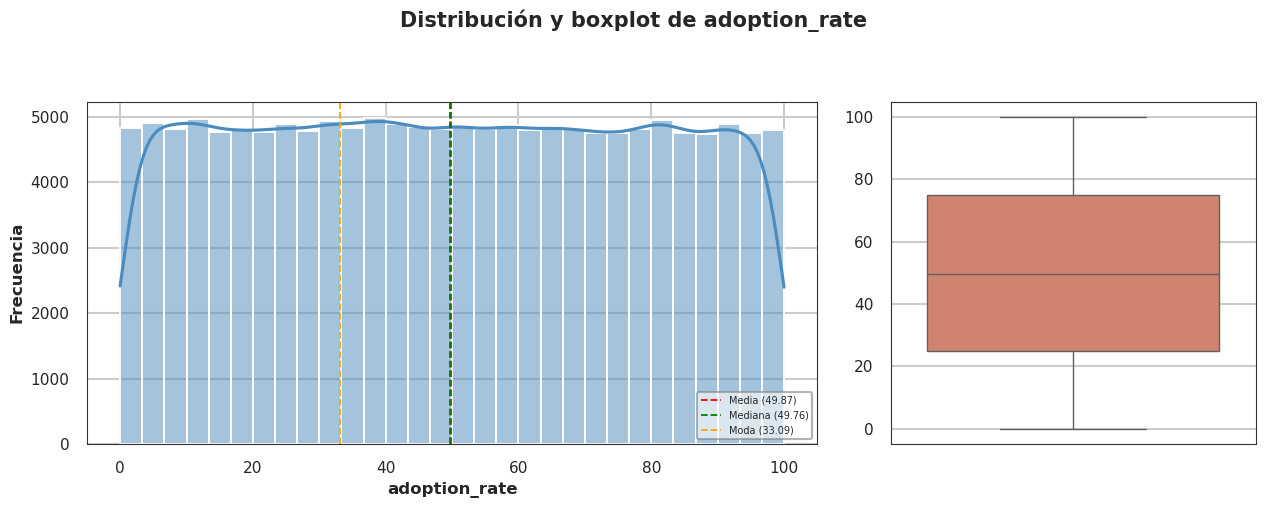

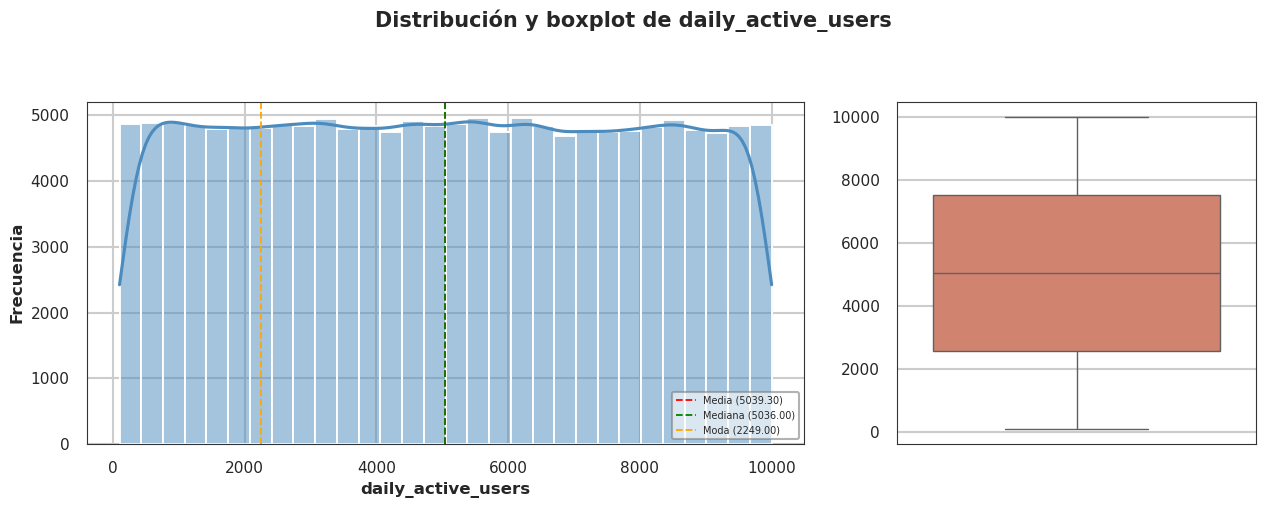

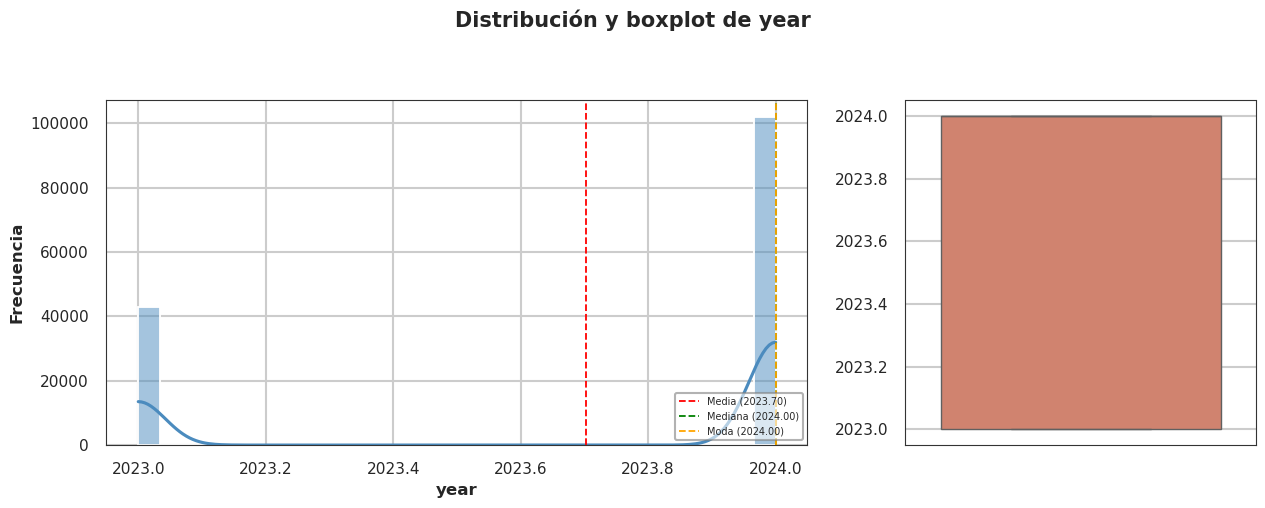

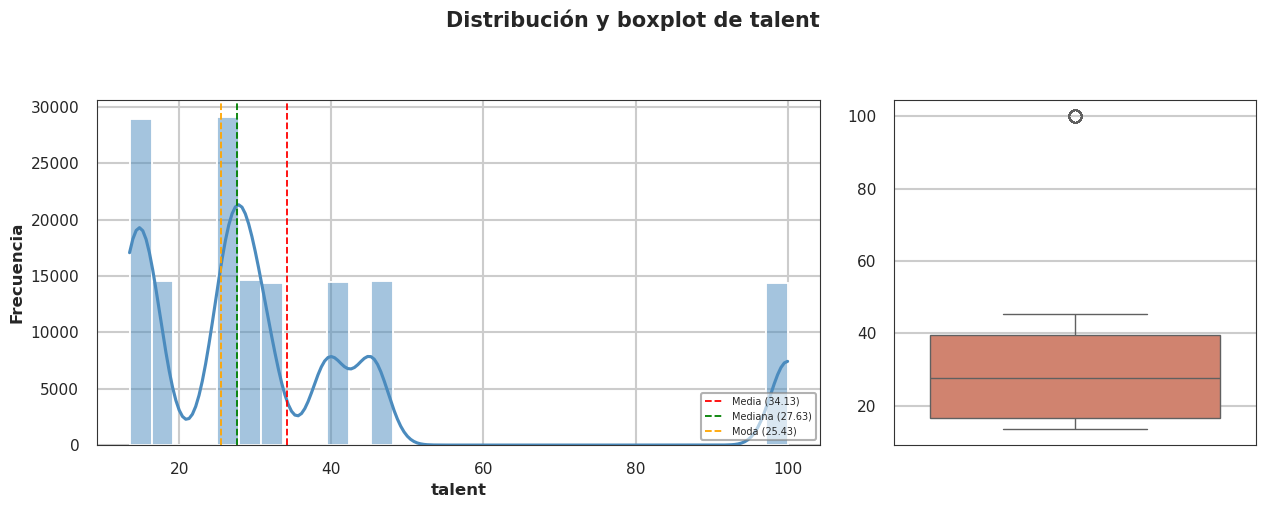

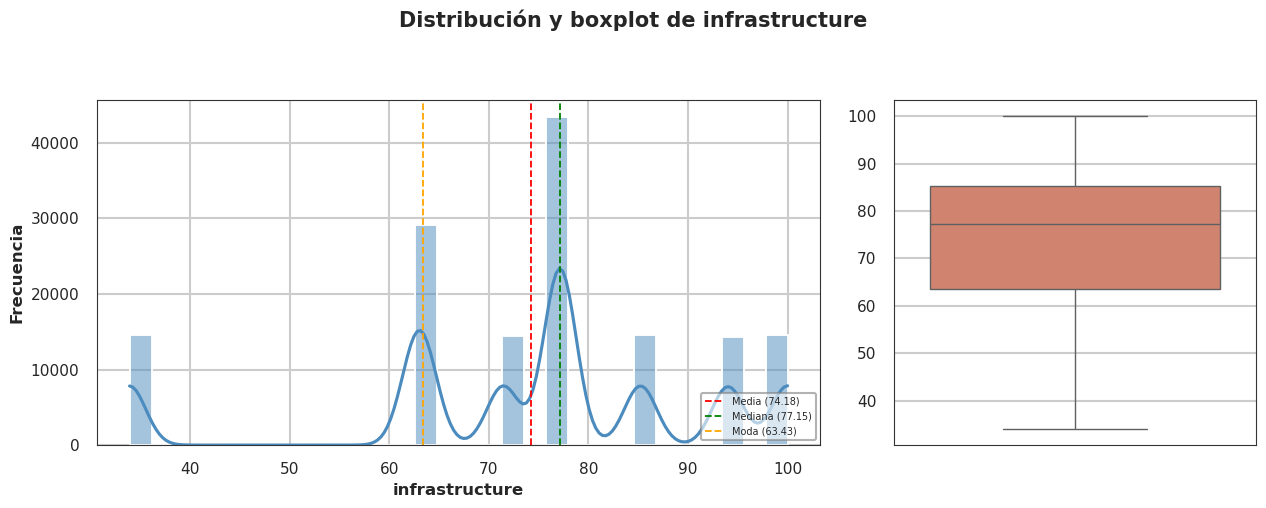

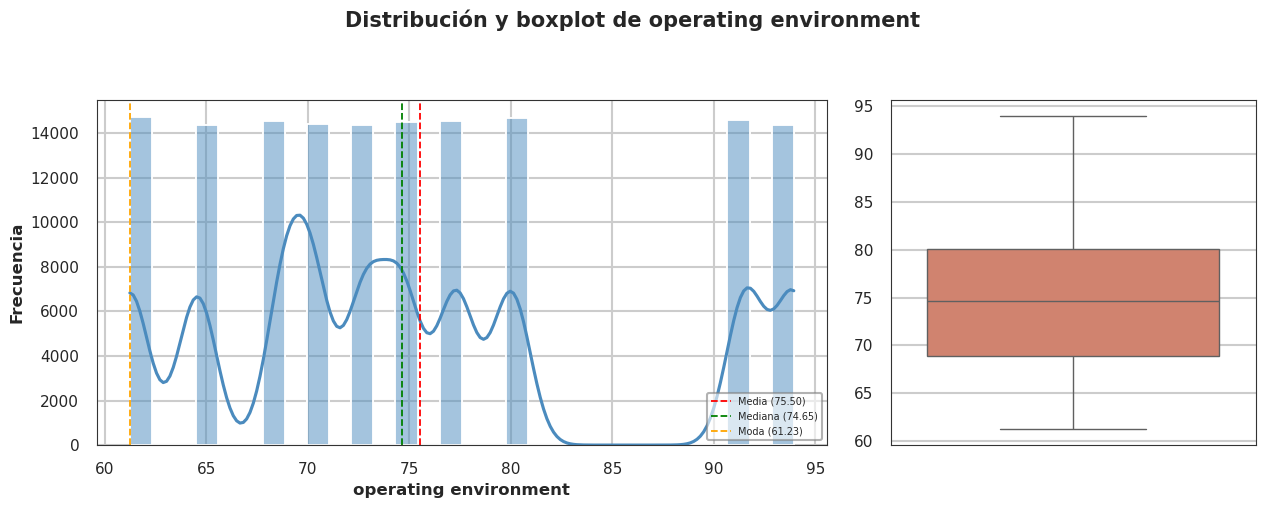

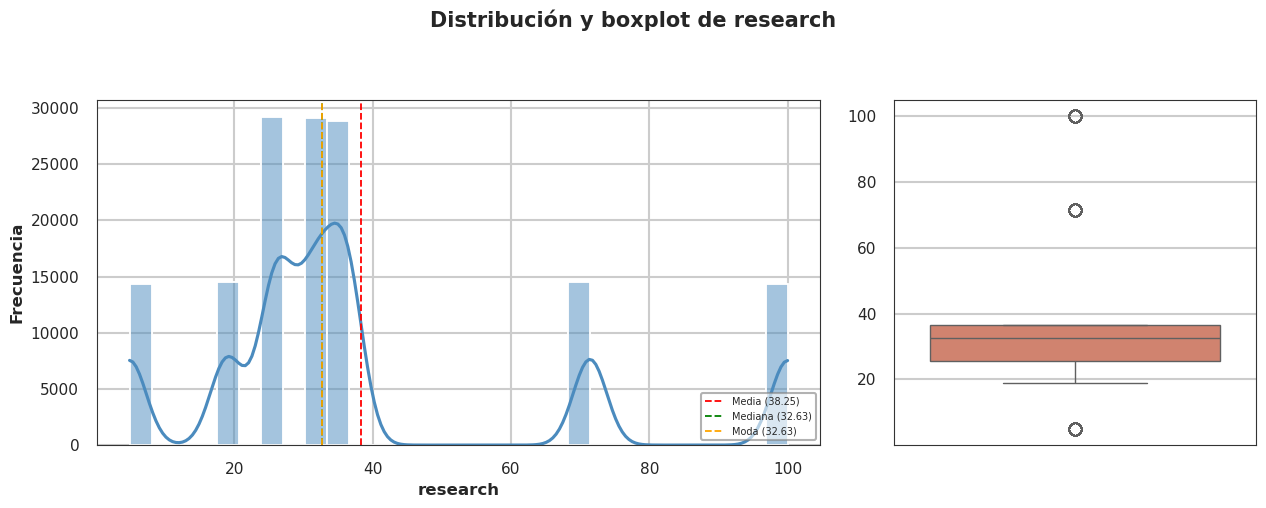

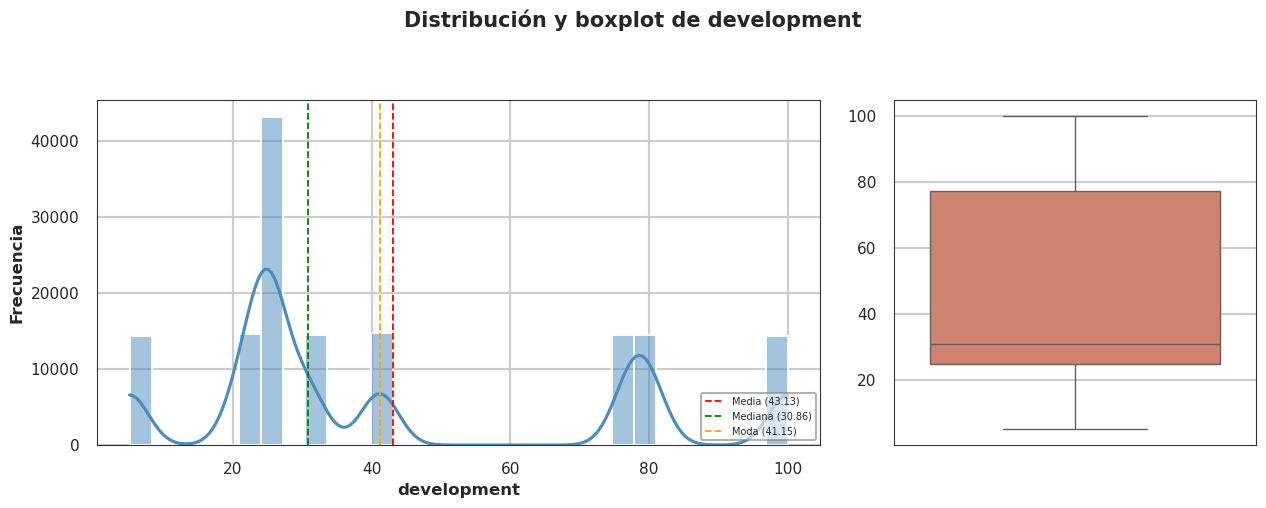

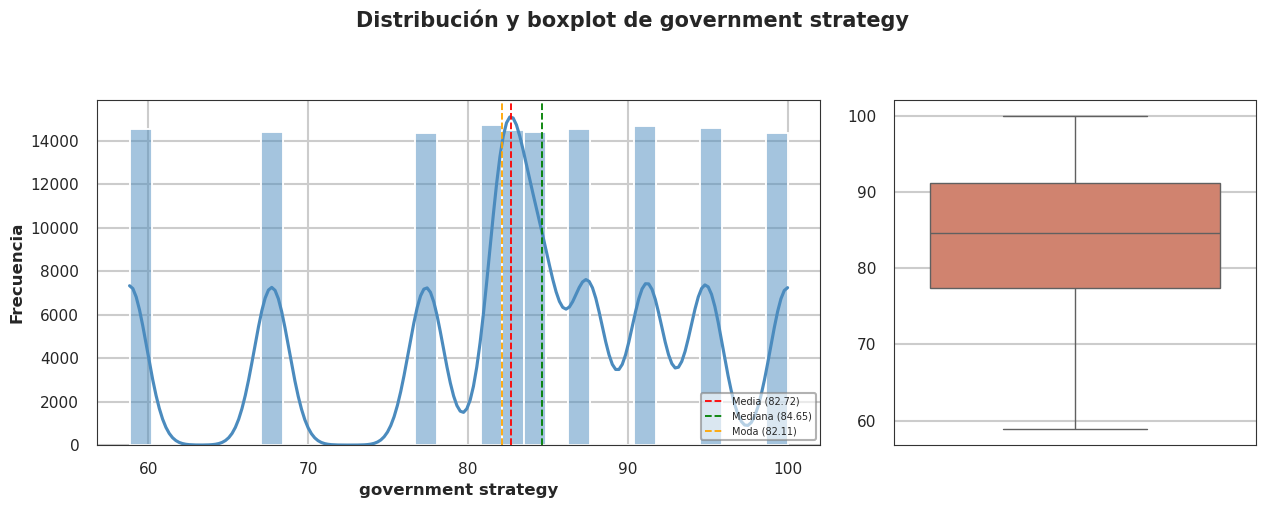

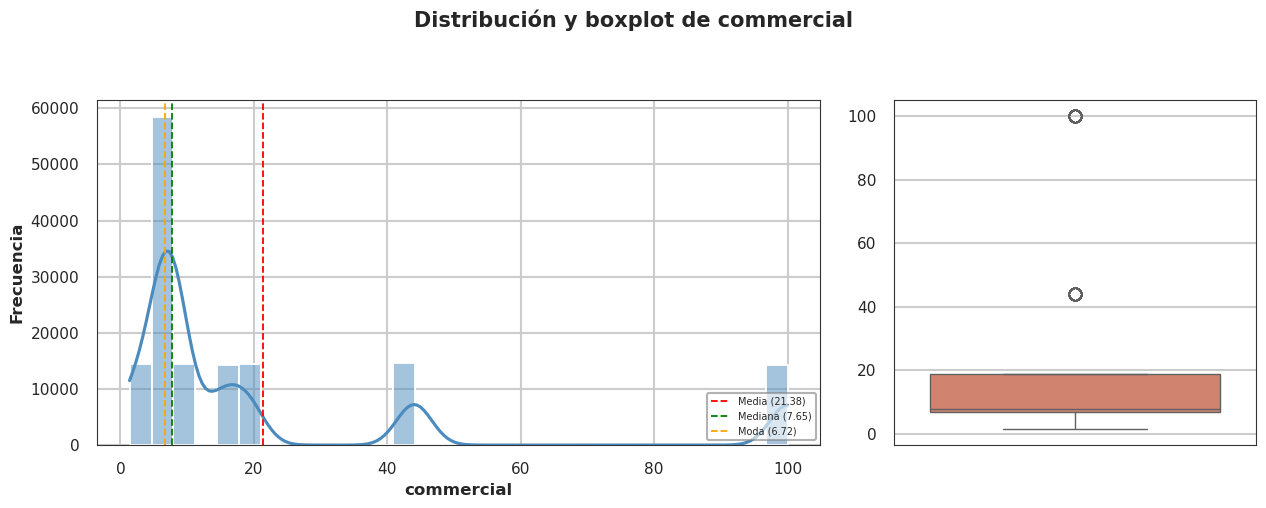

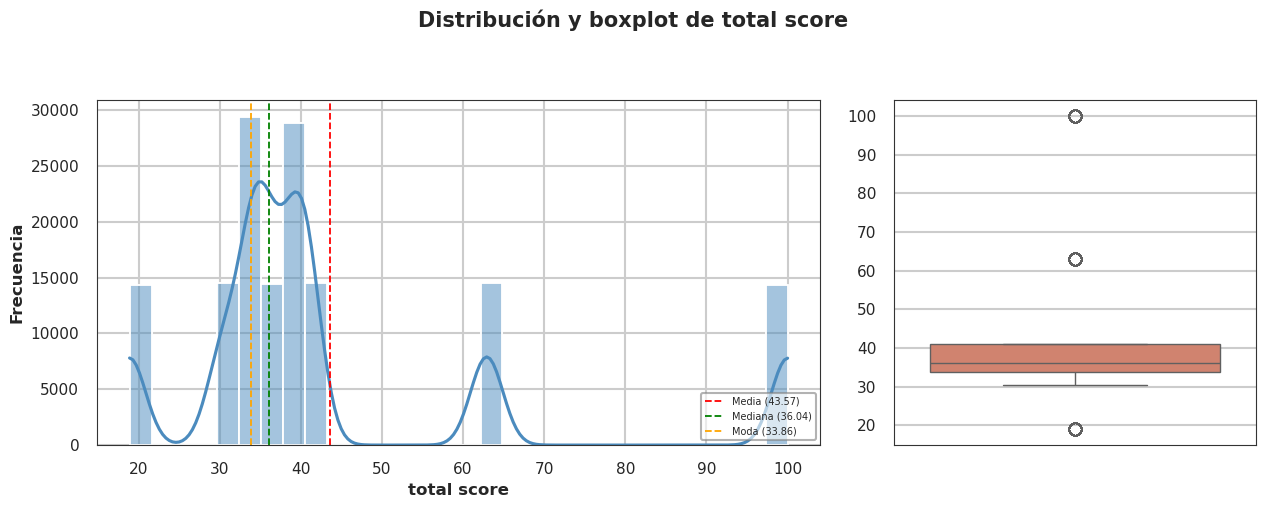


Gráfico variables categóricas


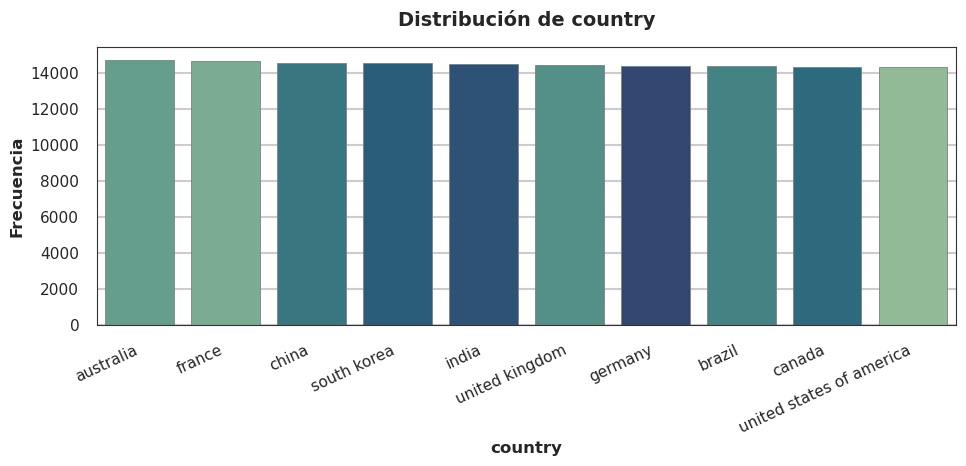

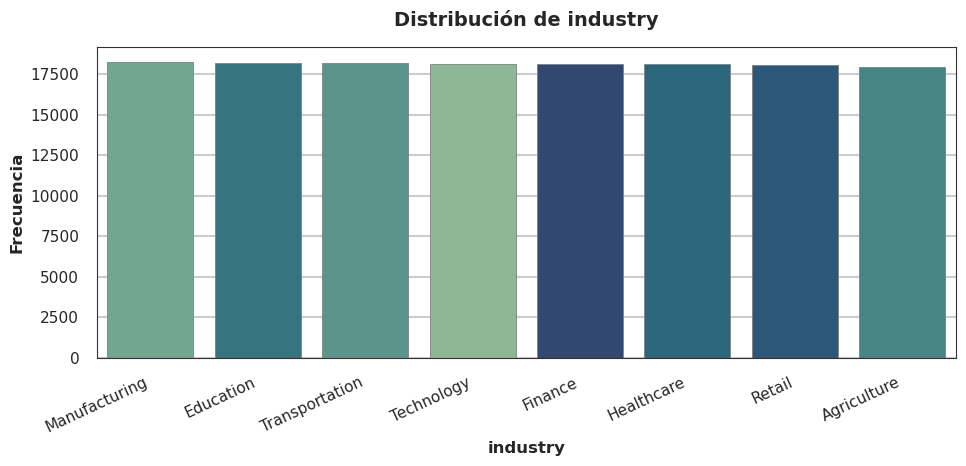

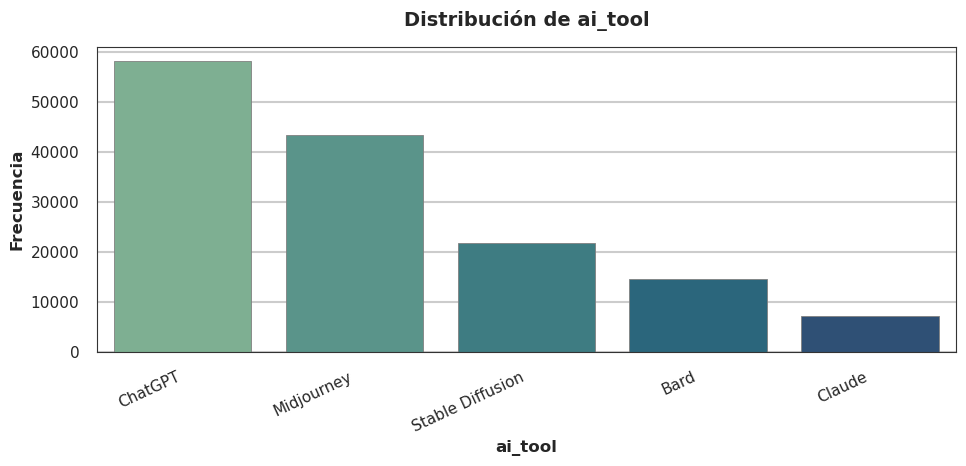

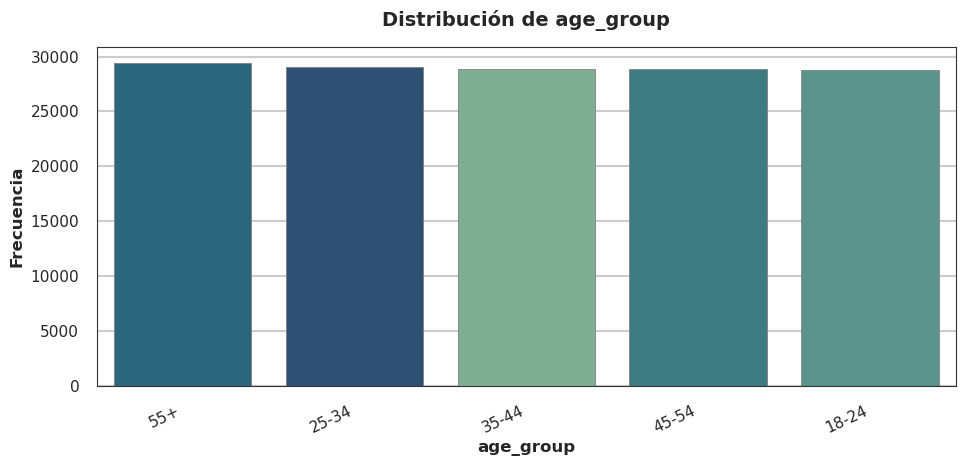

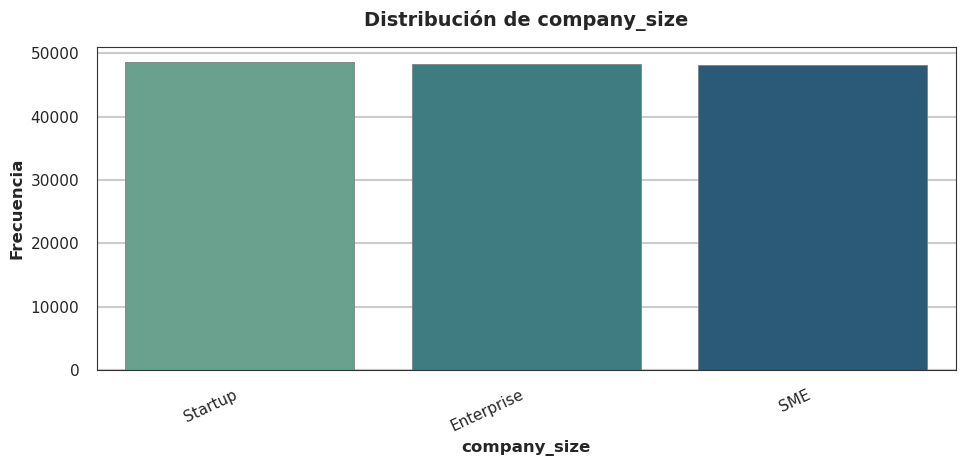

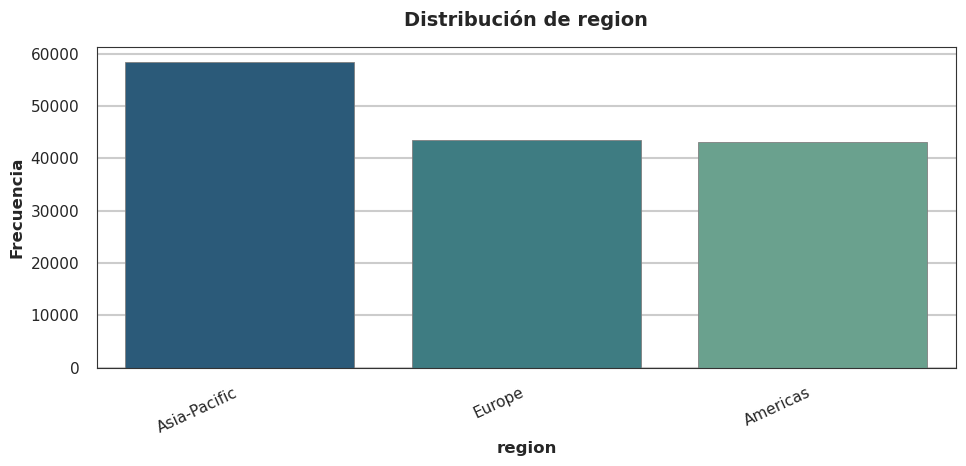

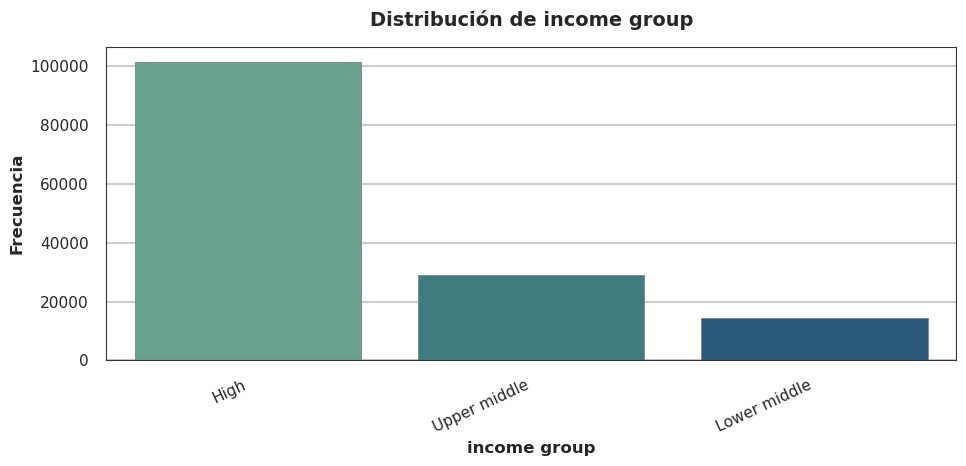

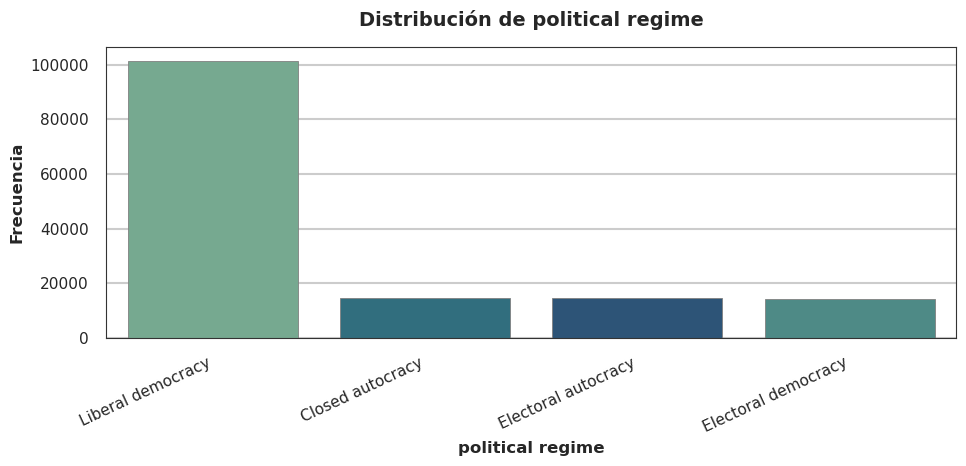

In [22]:
resumen_eda_1 = eda (df_union_1)

Dimensiones del dataset: 62 filas × 22 columnas

 Primeras 5 filas del dataset:


,country,talent,infrastructure,operating environment,research,development,government strategy,commercial,total score,region,income group,political regime,ai preparedness index,gdp per capita (current us$),gdp per capita growth (annual %),real gdp growth (annual change in %),innovation and economic integration,digitial infrastructure,individuals using the internet (% of population),secure internet servers (per 1 million people),regulation and ethics,human capital and labor market policies
0,united states of america,100.00,94.02,64.56,100.00,100.00,77.39,100.00,100.00,Americas,High,Liberal democracy,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,china,16.51,100.00,91.57,71.42,79.97,94.87,44.02,62.92,Asia-Pacific,Upper middle,Closed autocracy,0.64,12614.0,5.36,5.2,0.15,0.19,77.5,1508.0,0.15,0.15
2,united kingdom,39.65,71.43,74.65,36.50,25.03,82.82,18.91,40.93,Europe,High,Liberal democracy,0.73,49464.0,-0.48,0.3,0.16,0.18,96.3,47453.0,0.21,0.17
3,canada,31.28,77.05,93.94,30.67,25.78,100.00,14.88,40.19,Americas,High,Liberal democracy,0.71,53431.0,-1.68,1.2,0.16,0.17,94.0,42550.0,0.21,0.17
4,israel,35.76,67.58,82.44,32.63,27.96,43.91,27.33,39.89,Middle East,High,Liberal democracy,0.73,52642.0,0.33,2.0,0.19,0.17,87.0,13047.0,0.19,0.17



 Últimas 5 filas del dataset:


,country,talent,infrastructure,operating environment,research,development,government strategy,commercial,total score,region,income group,political regime,ai preparedness index,gdp per capita (current us$),gdp per capita growth (annual %),real gdp growth (annual change in %),innovation and economic integration,digitial infrastructure,individuals using the internet (% of population),secure internet servers (per 1 million people),regulation and ethics,human capital and labor market policies
57,sri lanka,6.27,34.64,35.79,0.12,0.95,35.57,0.09,6.62,Asia-Pacific,Lower middle,Electoral democracy,0.44,3828.0,-1.66,-2.3,0.09,0.11,51.2,482.0,0.11,0.13
58,egypt,1.11,38.84,0.00,2.08,1.54,68.72,0.31,4.83,Middle East,Lower middle,Electoral autocracy,0.39,3457.0,2.02,3.8,0.10,0.09,72.7,53.0,0.08,0.12
59,kenya,0.75,14.11,29.84,0.07,12.15,7.75,0.31,2.30,Africa,Lower middle,Electoral autocracy,0.45,1952.0,3.48,5.6,0.11,0.10,35.0,297.0,0.13,0.11
60,nigeria,2.74,0.00,50.10,0.45,2.06,7.75,0.33,1.38,Africa,Lower middle,Electoral autocracy,0.34,1597.0,0.72,2.9,0.09,0.08,39.2,48.0,0.07,0.09
61,pakistan,8.00,2.43,12.48,2.17,1.09,13.92,0.27,0.00,Asia-Pacific,Lower middle,Electoral autocracy,0.37,1365.0,-1.58,-0.2,0.09,0.08,27.4,113.0,0.11,0.10



Información general:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 22 columns):
 #   Column                                            Non-Null Count  Dtype  
---  ------                                            --------------  -----  
 0   country                                           62 non-null     object 
 1   talent                                            62 non-null     float64
 2   infrastructure                                    62 non-null     float64
 3   operating environment                             62 non-null     float64
 4   research                                          62 non-null     float64
 5   development                                       62 non-null     float64
 6   government strategy                               62 non-null     float64
 7   commercial                                        62 non-null     float64
 8   total score                                       62 non-null     float64
 9   r

,Tipo de dato
country,object
talent,float64
infrastructure,float64
operating environment,float64
research,float64
development,float64
government strategy,float64
commercial,float64
total score,float64
region,object



Columnas numéricas: 18
Columnas categóricas: 4

Estadísticas descriptivas (numéricas):


,count,mean,std,min,1%,5%,25%,50%,75%,95%,99%,max
talent,62.0,16.803065,15.214963,0.00,0.4575,1.7665,7.3650,13.445,24.5675,39.1990,66.6147,100.00
infrastructure,62.0,63.503710,20.217525,0.00,1.4823,33.9465,55.8575,65.230,75.9475,93.7940,97.6271,100.00
operating environment,62.0,66.925484,20.000424,0.00,7.6128,35.8330,58.1075,69.505,80.5000,94.5195,99.7316,100.00
research,62.0,16.610000,17.413996,0.00,0.0427,0.2885,3.0325,12.930,25.4125,37.6115,82.5662,100.00
development,62.0,14.824677,19.419279,0.00,0.0000,0.0570,1.2025,9.005,19.9800,40.8160,87.7817,100.00
government strategy,62.0,57.865645,26.252448,0.00,4.7275,12.1800,41.0300,63.930,77.9525,91.2760,96.8707,100.00
commercial,62.0,6.171935,14.029632,0.00,0.0549,0.1545,0.6975,2.585,5.3075,18.7180,65.8522,100.00
total score,62.0,23.914677,15.123586,0.00,0.8418,4.9195,14.8050,23.220,30.4875,40.1750,77.3812,100.00
ai preparedness index,55.0,0.612000,0.118437,0.34,0.3562,0.4180,0.5200,0.630,0.7150,0.7600,0.7892,0.80
gdp per capita (current us$),55.0,36381.909091,29904.484528,1365.00,1490.2800,2322.3000,11996.5000,30133.000,53178.5000,91417.0000,115291.4000,128678.00



Posibles outliers detectados:


,Filas con outliers
talent,1
infrastructure,3
operating environment,2
research,2
development,3
commercial,7
total score,2
gdp per capita (current us$),1
gdp per capita growth (annual %),3
real gdp growth (annual change in %),3



Estadísticas descriptivas (categóricas):


,count,unique,top,freq
country,62,62,united states of america,1
region,62,5,Europe,29
income group,62,3,High,43
political regime,62,4,Liberal democracy,27



Valores nulos por columna:


,Nulos,% Nulos
innovation and economic integration,7,11.29
digitial infrastructure,7,11.29
individuals using the internet (% of population),7,11.29
secure internet servers (per 1 million people),7,11.29
gdp per capita (current us$),7,11.29
ai preparedness index,7,11.29
regulation and ethics,7,11.29
human capital and labor market policies,7,11.29
real gdp growth (annual change in %),7,11.29
gdp per capita growth (annual %),7,11.29



No se encontraron filas duplicadas en el dataset.

Resumen general de columnas:


,Columna,Tipo,Valores únicos,% Nulos
country,country,object,62,0.00
talent,talent,float64,62,0.00
infrastructure,infrastructure,float64,62,0.00
operating environment,operating environment,float64,62,0.00
research,research,float64,61,0.00
development,development,float64,59,0.00
government strategy,government strategy,float64,59,0.00
commercial,commercial,float64,59,0.00
total score,total score,float64,62,0.00
region,region,object,5,0.00



Visualizaciones

Gráfico variables numéricas


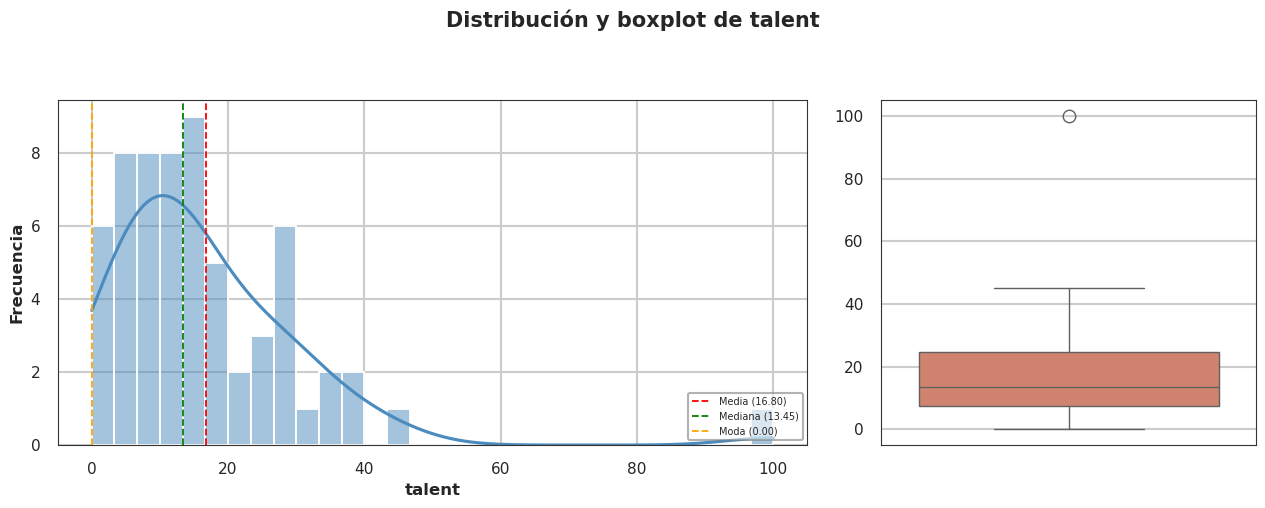

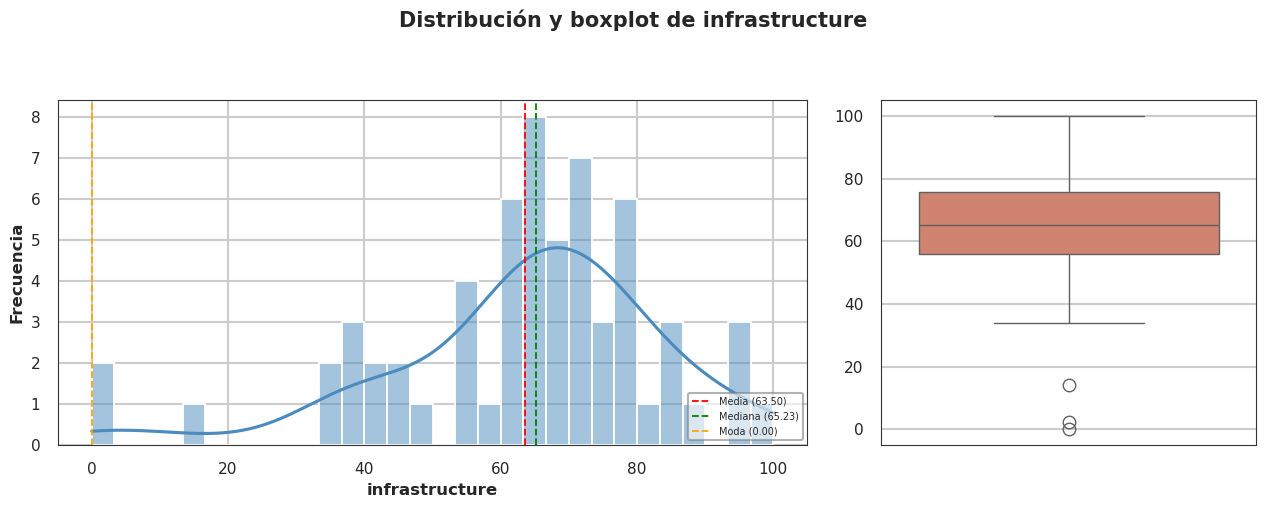

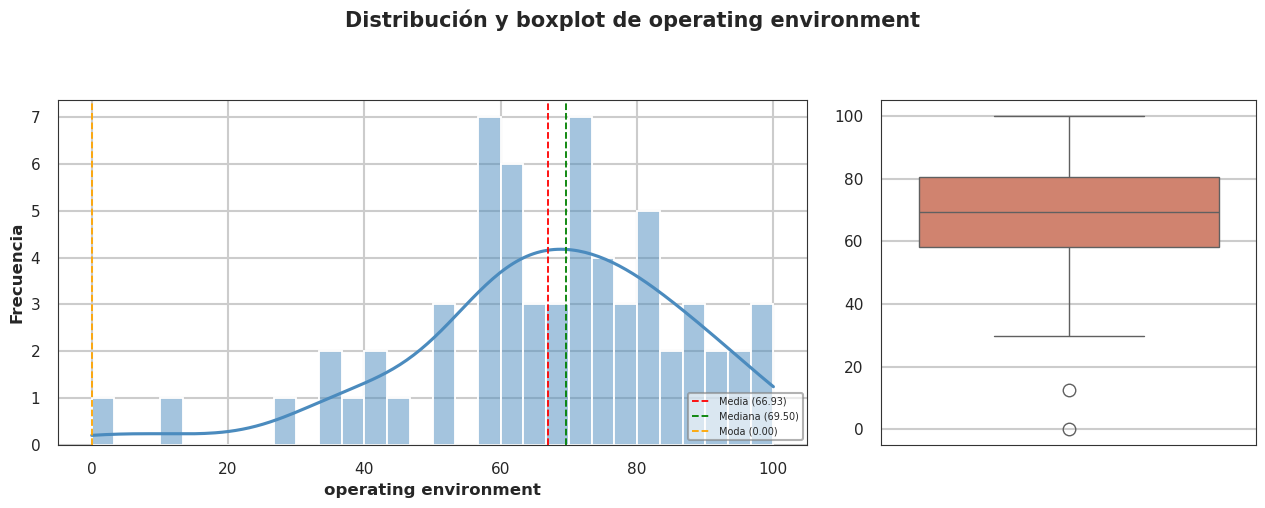

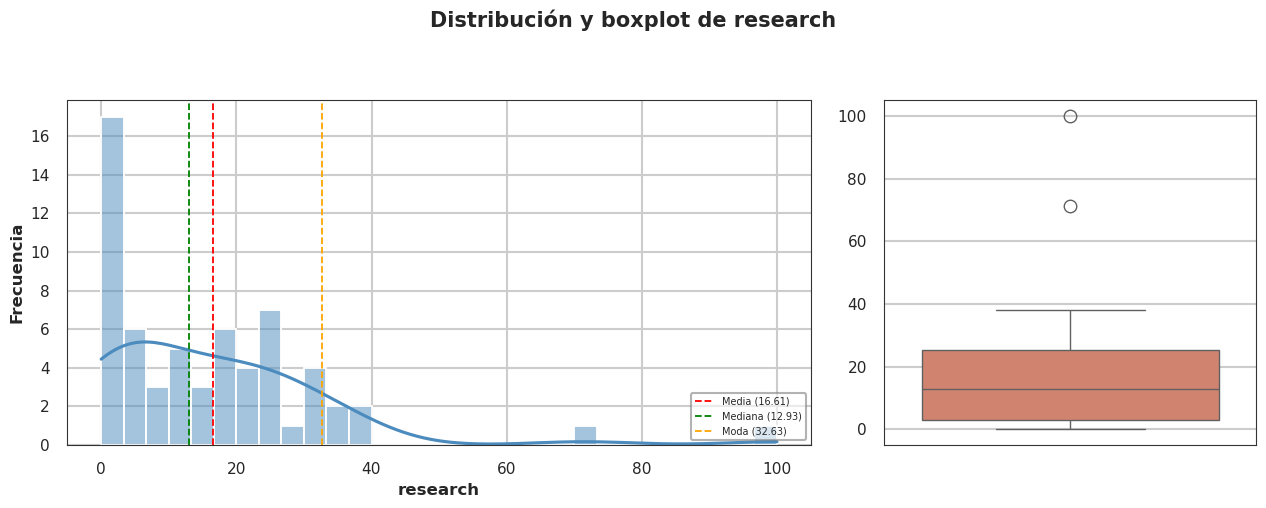

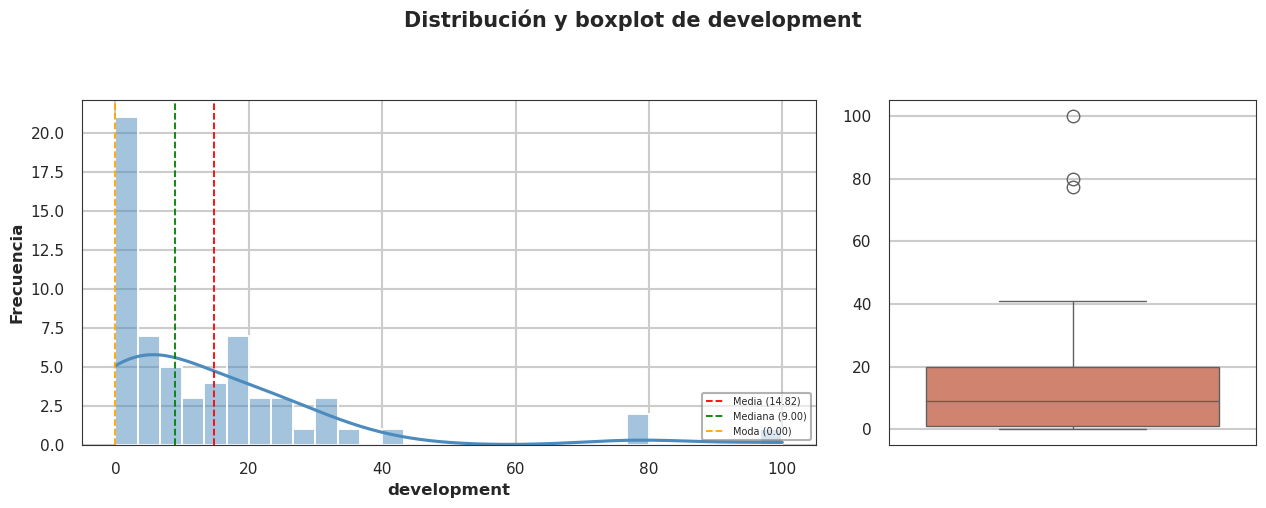

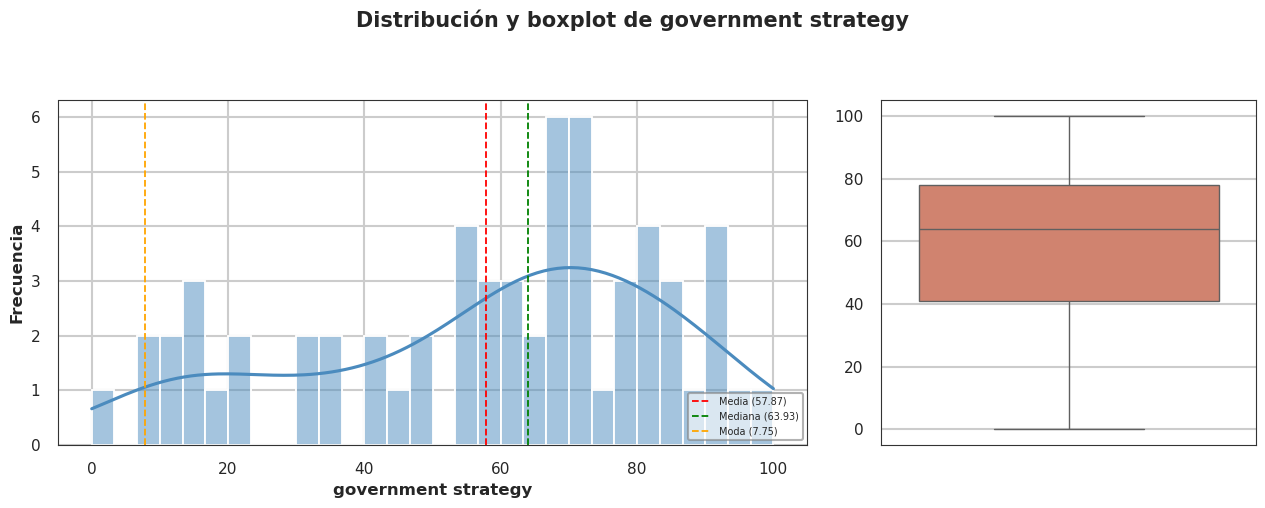

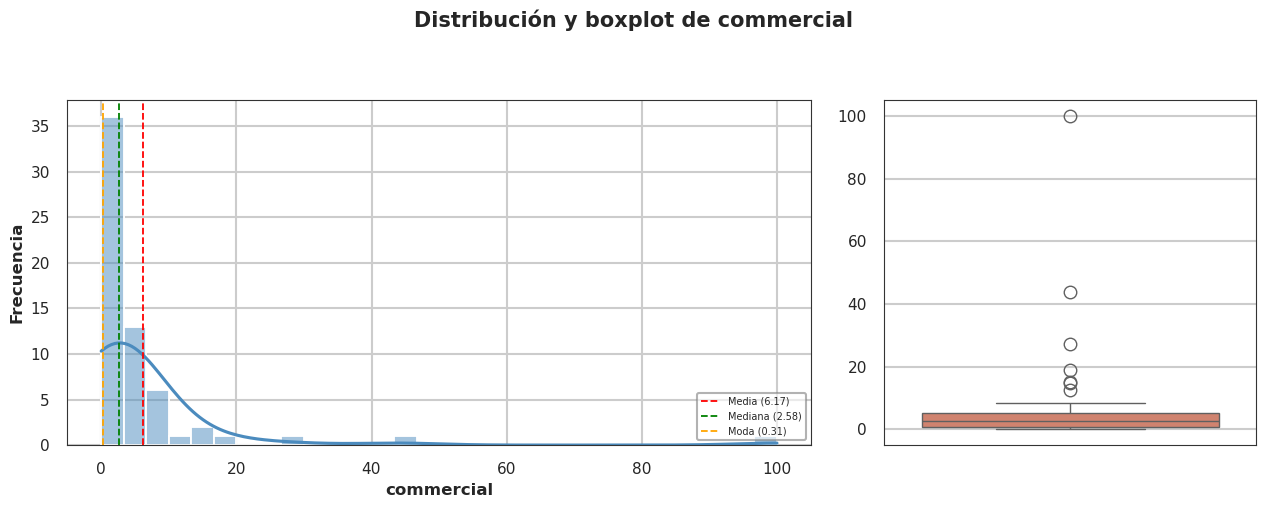

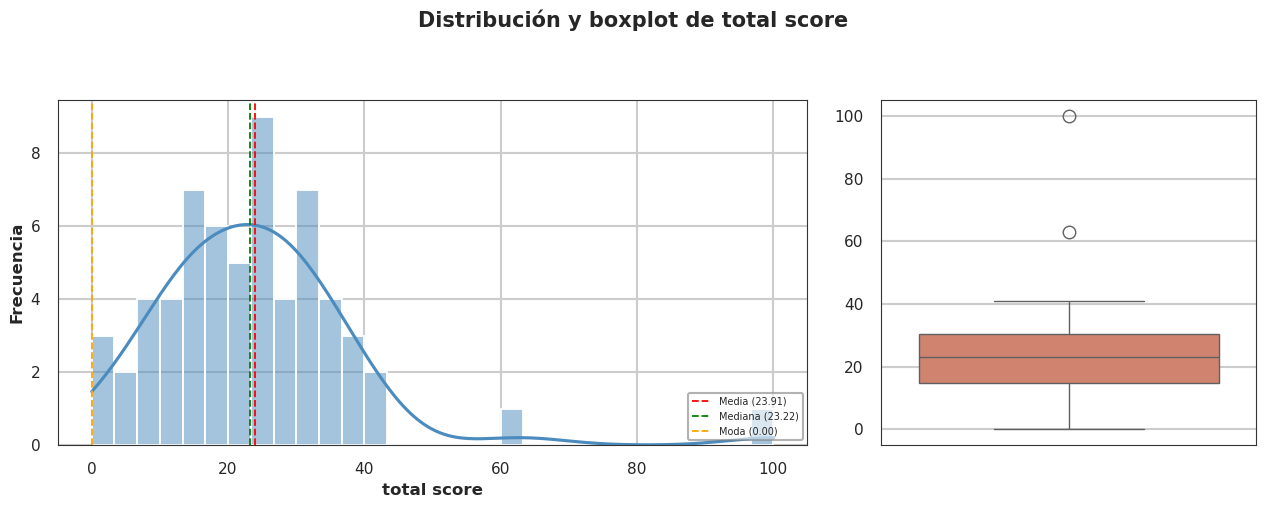

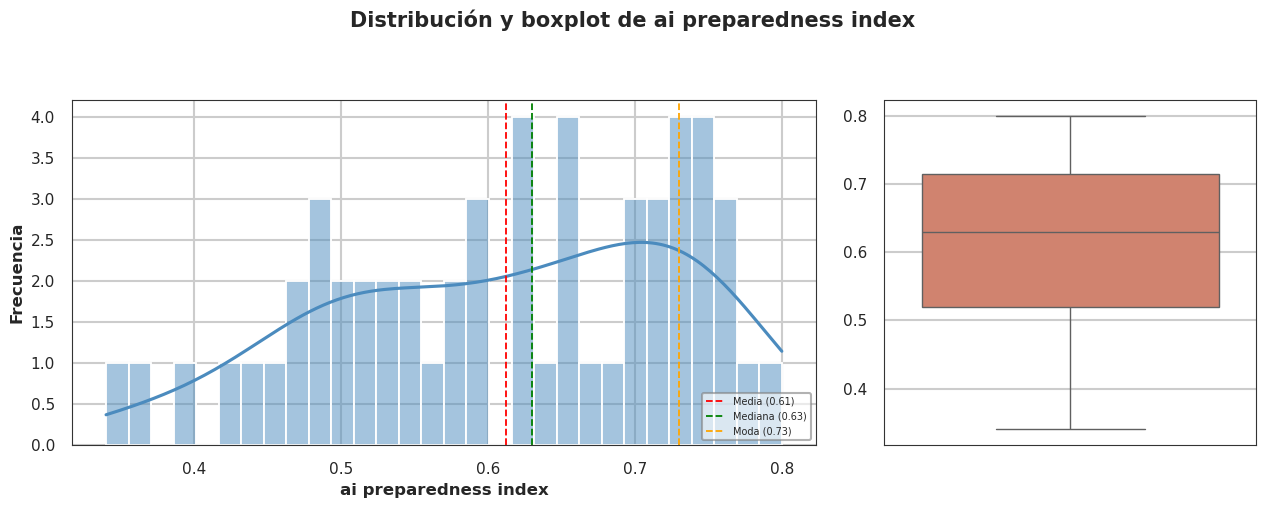

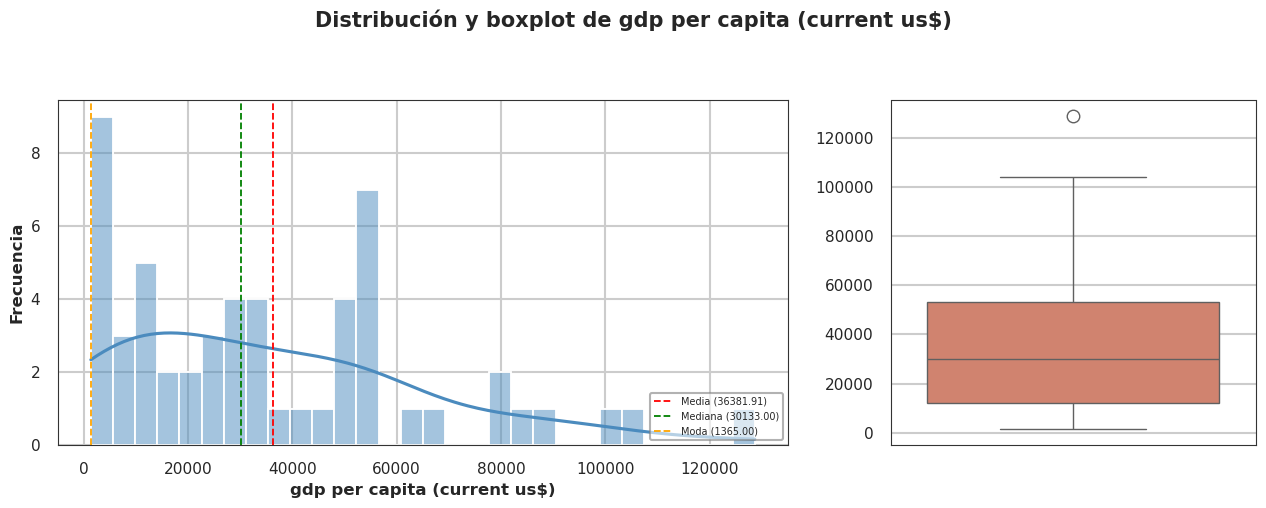

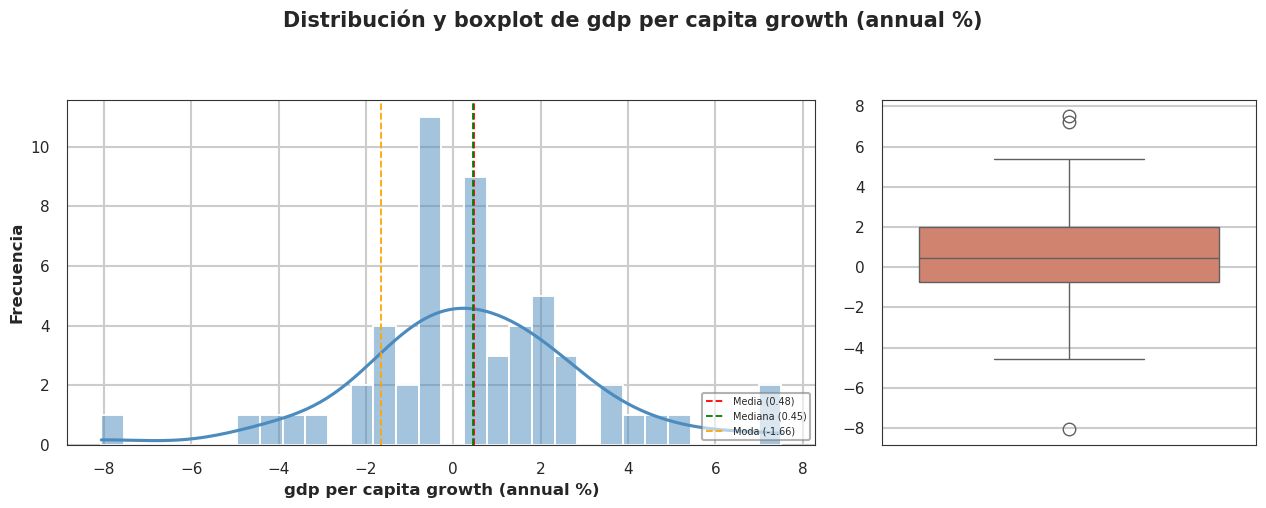

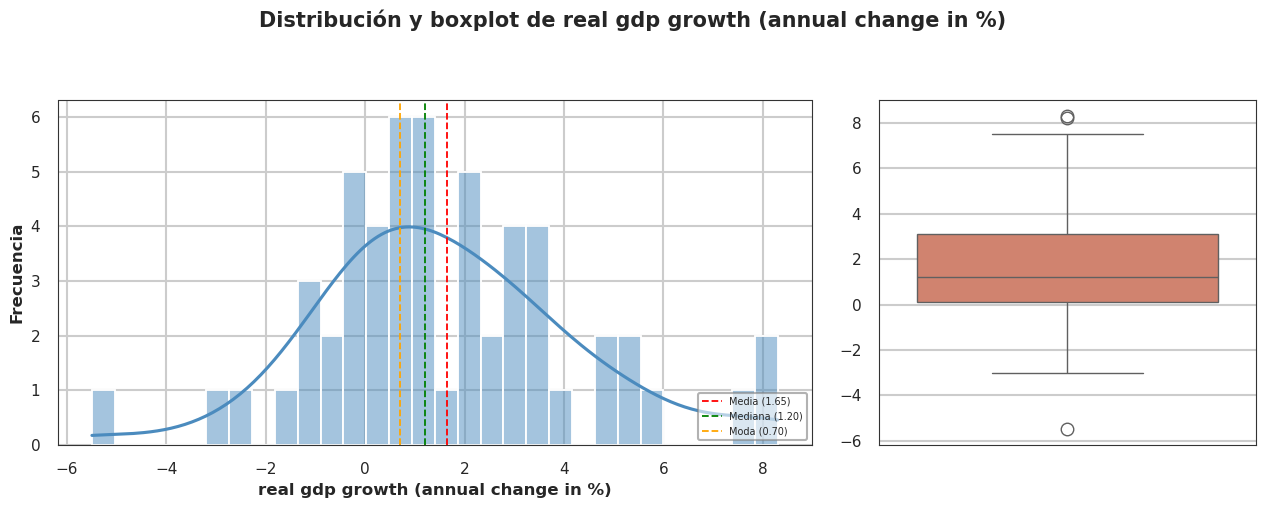

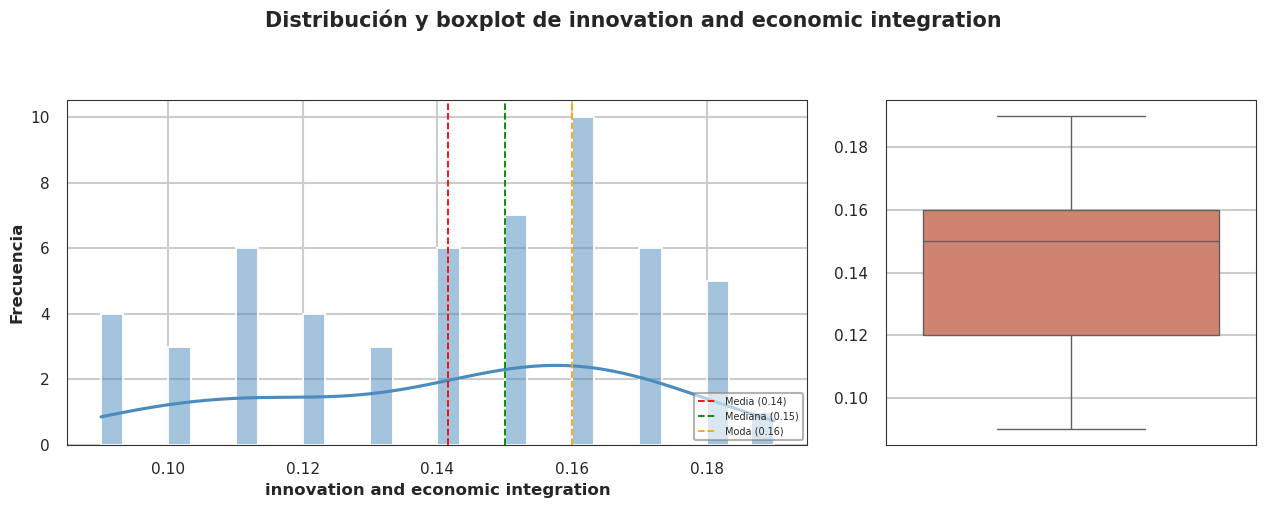

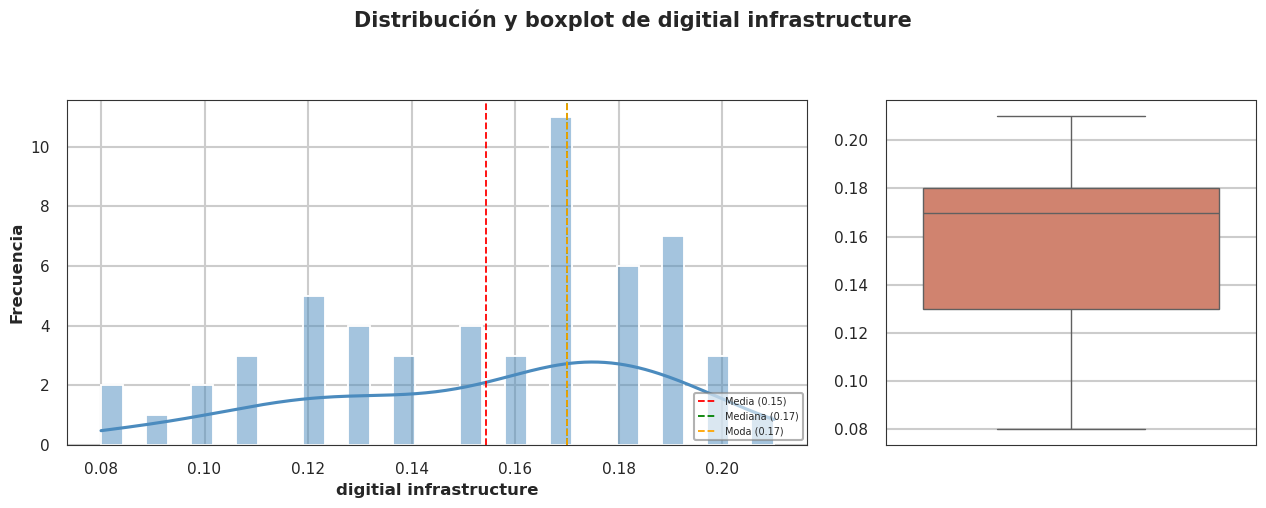

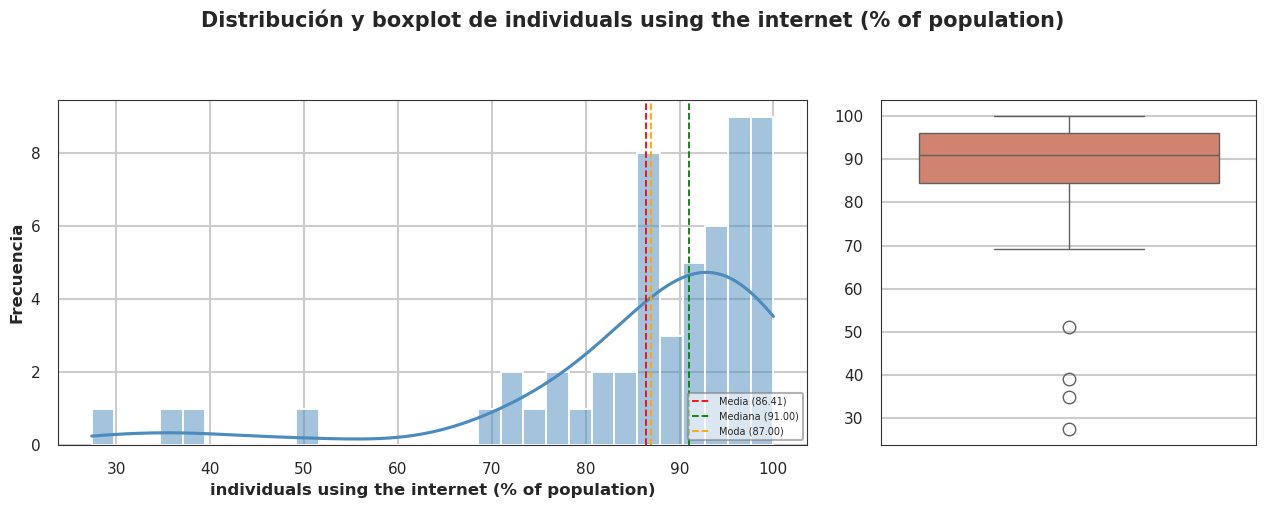

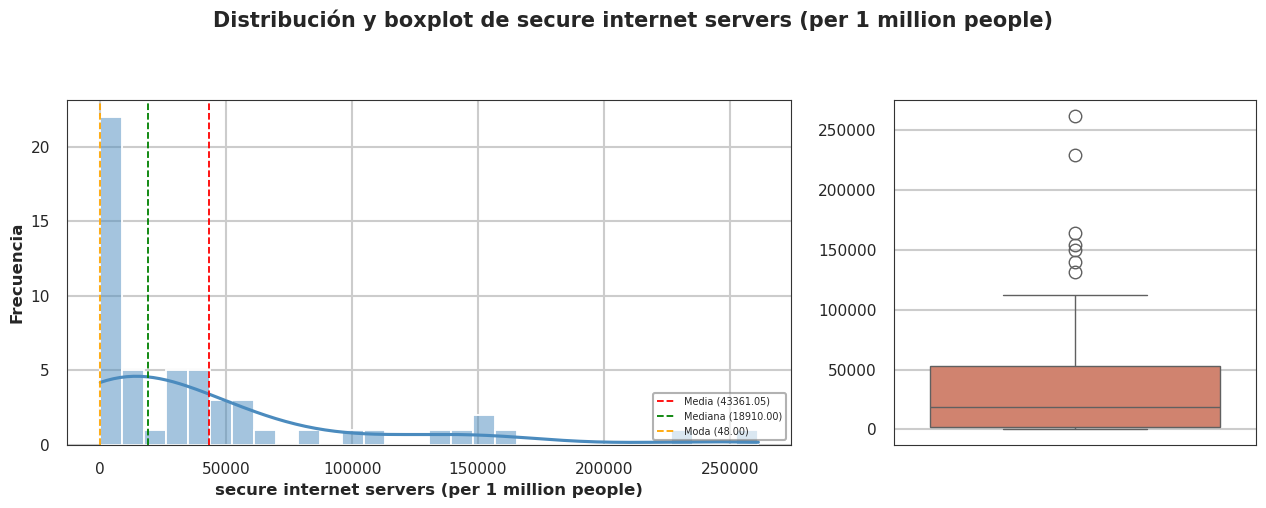

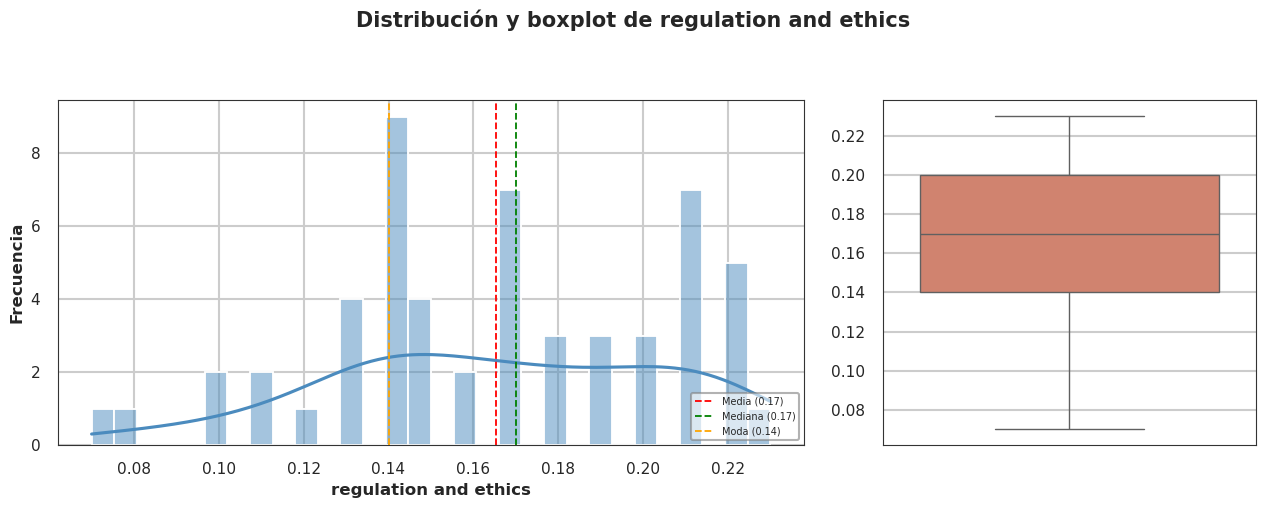

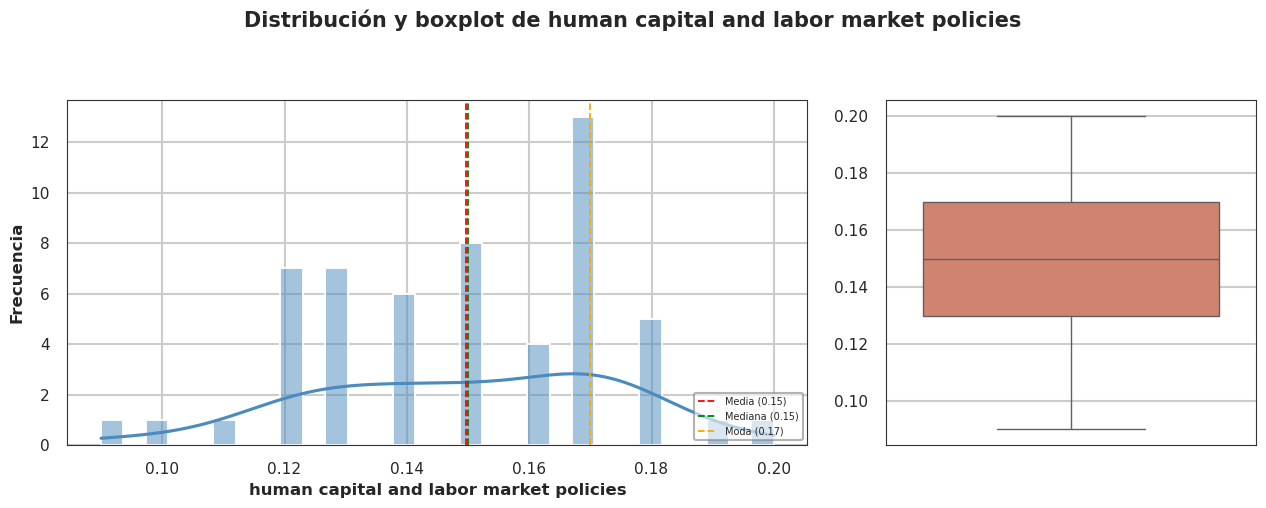


Gráfico variables categóricas


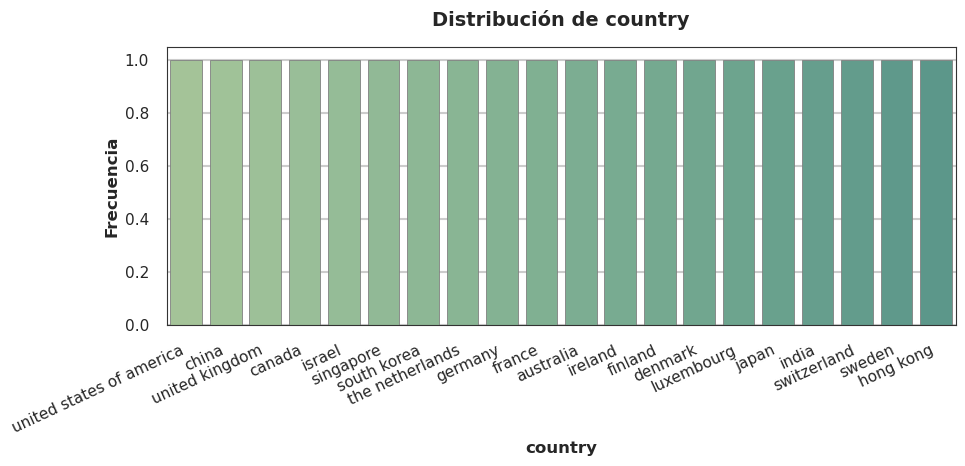

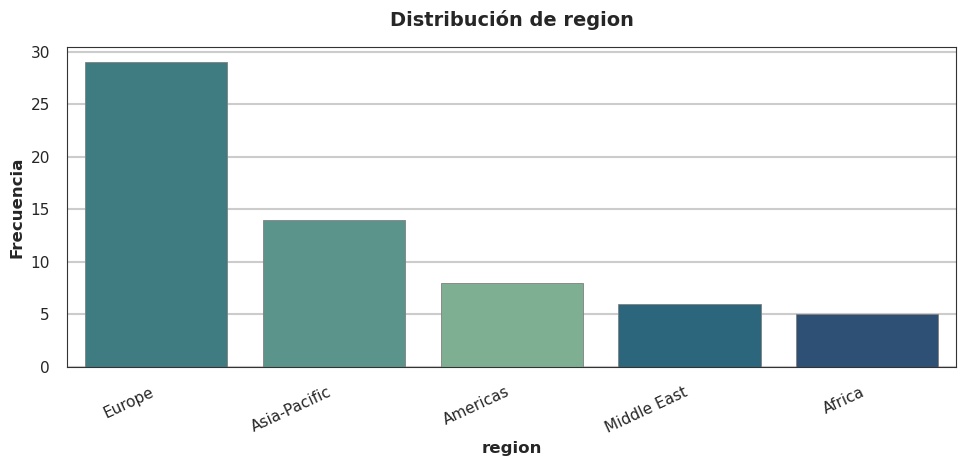

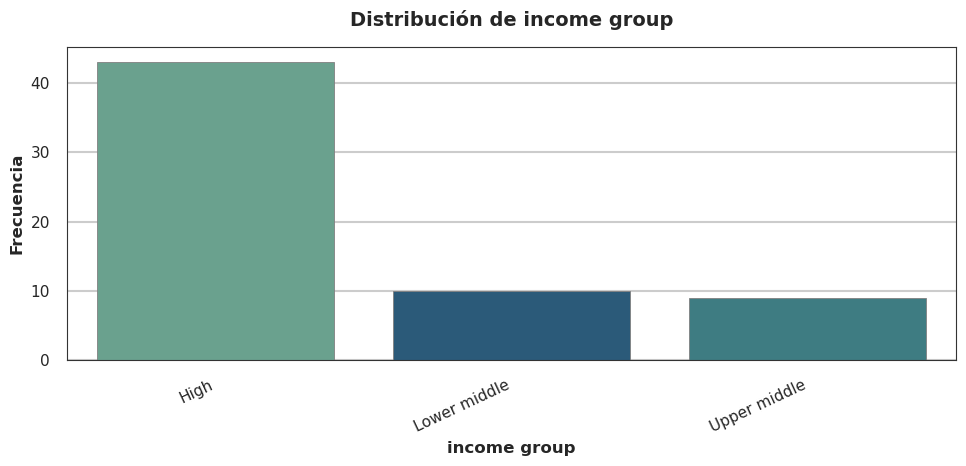

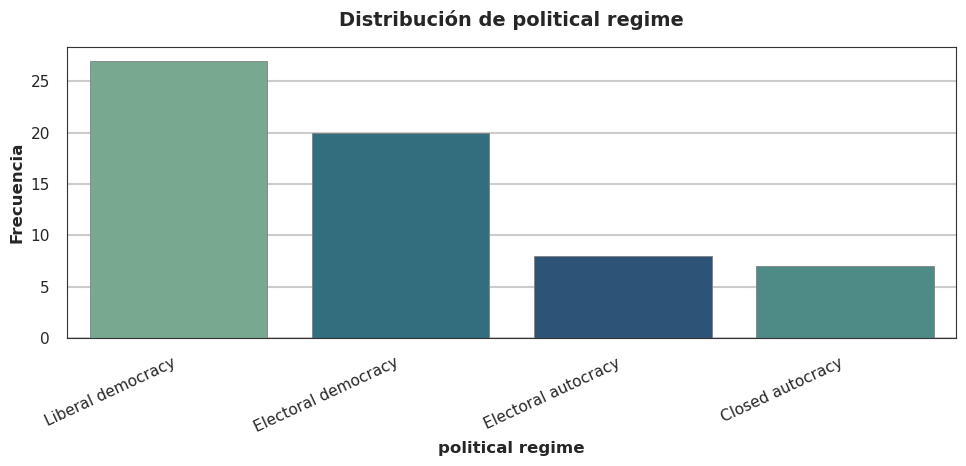

In [23]:
resumen_eda_2 = eda(df_union_2)

Tratamos los nulos que se han generado en df_union_2:



In [24]:
# IMPUTACIÓN DE NULOS EN df_union_2

# 1. Índices o puntuaciones — media por región
cols_region_mean = [
    'ai preparedness index',
    'innovation and economic integration',
    'regulation and ethics',
    'human capital and labor market policies'
]

for col in cols_region_mean:
    df_union_2[col] = df_union_2.groupby('region')[col].transform(
        lambda x: x.fillna(x.mean())
    )

# 2. Indicadores económicos — media por income group
cols_income_mean = [
    'gdp per capita (current us$)',
    'gdp per capita growth (annual %)',
    'real gdp growth (annual change in %)'
]

for col in cols_income_mean:
    df_union_2[col] = df_union_2.groupby('income group')[col].transform(
        lambda x: x.fillna(x.mean())
    )

# 3. Infraestructura y conectividad — mediana por región
cols_region_median = [
    'digitial infrastructure',
    'individuals using the internet (% of population)',
    'secure internet servers (per 1 million people)'
]

for col in cols_region_median:
    df_union_2[col] = df_union_2.groupby('region')[col].transform(
        lambda x: x.fillna(x.median())
    )


# COMPROBACIÓN FINAL

print("Valores nulos restantes por columna:\n")
print(df_union_2.isnull().sum().sort_values(ascending=False))

Valores nulos restantes por columna:

country                                             0
talent                                              0
infrastructure                                      0
operating environment                               0
research                                            0
development                                         0
government strategy                                 0
commercial                                          0
total score                                         0
region                                              0
income group                                        0
political regime                                    0
ai preparedness index                               0
gdp per capita (current us$)                        0
gdp per capita growth (annual %)                    0
real gdp growth (annual change in %)                0
innovation and economic integration                 0
digitial infrastructure                     

#### COMPROBACIÓN DE NULOS EN CADA UNA DE LAS UNIONES

In [25]:
print(df_union_1.isnull().values.any(), df_union_2.isnull().values.any())

False False


##### GUARDAMOS LOS DATASETS EN FORMATO CSV PARA SU VOLCADO A POWER BI:

Guardamos en csv:

In [26]:
df_union_1.to_csv("union_1_bi.csv", index=False, encoding="utf-8")

In [27]:
df_union_2.to_csv("union_2_bi.csv", index=False, encoding="utf-8")